# Import for library

In [169]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore, stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Read data

## Data Frame HIGH

In [170]:
df_High= pd.read_csv('high.csv')

In [171]:
df_High.head()

,TRADE_DATE,SEC_CODE,SYMBOL1,MARKET,VOLUME,TRADE_QTY,NO_OF_TRADES,HIGH,BEST_ASK_PRICE,BEST_ASK_QTY,BEST_BID_PRICE,BEST_BID_QTY
0,01/02/2022,111001,JOIB,1,199083.73,54378,73,3.67,2.65,585.0,3.13,2000.0
1,01/02/2022,111002,JOKB,1,12707.76,9009,17,1.42,1.36,493.0,1.86,1570.0
2,01/02/2022,111003,JCBK,2,727.41,726,7,1.03,1.14,1853.0,1.64,1000.0
3,01/02/2022,111004,THBK,1,1558.10,394,5,3.97,1.09,660.0,1.59,46.0
4,01/02/2022,111006,SIBK,1,29030.98,14867,11,1.98,1.23,1000.0,1.73,333.0


In [172]:
df_High.shape

(28012, 12)

In [173]:
df_High.isnull().sum()

TRADE_DATE        0
SEC_CODE          0
SYMBOL1           0
MARKET            0
VOLUME            0
TRADE_QTY         0
NO_OF_TRADES      0
HIGH              0
BEST_ASK_PRICE    0
BEST_ASK_QTY      0
BEST_BID_PRICE    0
BEST_BID_QTY      0
dtype: int64

In [174]:
df_High.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28012 entries, 0 to 28011
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TRADE_DATE      28012 non-null  object 
 1   SEC_CODE        28012 non-null  int64  
 2   SYMBOL1         28012 non-null  object 
 3   MARKET          28012 non-null  int64  
 4   VOLUME          28012 non-null  float64
 5   TRADE_QTY       28012 non-null  int64  
 6   NO_OF_TRADES    28012 non-null  int64  
 7   HIGH            28012 non-null  float64
 8   BEST_ASK_PRICE  28012 non-null  float64
 9   BEST_ASK_QTY    28012 non-null  float64
 10  BEST_BID_PRICE  28012 non-null  float64
 11  BEST_BID_QTY    28012 non-null  float64
dtypes: float64(6), int64(4), object(2)
memory usage: 2.6+ MB


In [175]:
df_High["TRADE_DATE"] = pd.to_datetime(df_High["TRADE_DATE"])
df_High["TRADE_DATE"]

<ipython-input-175-1946d03b8107>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_High["TRADE_DATE"] = pd.to_datetime(df_High["TRADE_DATE"])


0       2022-01-02
1       2022-01-02
2       2022-01-02
3       2022-01-02
4       2022-01-02
           ...    
28007   2022-10-31
28008   2022-10-31
28009   2022-10-31
28010   2022-10-31
28011   2022-10-31
Name: TRADE_DATE, Length: 28012, dtype: datetime64[ns]

In [176]:
df_High.drop(['SEC_CODE'], axis=1, inplace=True)

In [177]:
df_High.describe(include='all')

<ipython-input-177-48954f722667>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_High.describe(include='all')


,TRADE_DATE,SYMBOL1,MARKET,VOLUME,TRADE_QTY,NO_OF_TRADES,HIGH,BEST_ASK_PRICE,BEST_ASK_QTY,BEST_BID_PRICE,BEST_BID_QTY
count,28012,28012,28012.000000,2.801200e+04,2.801200e+04,28012.000000,28012.000000,28012.000000,2.801200e+04,28012.000000,2.801200e+04
unique,248,213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2022-03-13 00:00:00,JOIB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,135,247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2022-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2022-12-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.385906,6.312677e+04,4.270346e+04,28.061545,1.713816,1.620775,1.979999e+04,2.113421,2.452341e+04
std,NaN,NaN,0.750480,3.022558e+05,1.451785e+05,66.231007,4.667872,1.520599,6.742718e+04,1.500857,1.008184e+05
min,NaN,NaN,0.000000,2.000000e-02,1.000000e+00,1.000000,0.020000,1.000000,0.000000e+00,1.500000,0.000000e+00
25%,NaN,NaN,1.000000,6.398300e+02,1.000000e+03,3.000000,0.380000,1.050000,5.000000e+02,1.550000,4.000000e+02


In [178]:
df_High.dtypes

TRADE_DATE        datetime64[ns]
SYMBOL1                   object
MARKET                     int64
VOLUME                   float64
TRADE_QTY                  int64
NO_OF_TRADES               int64
HIGH                     float64
BEST_ASK_PRICE           float64
BEST_ASK_QTY             float64
BEST_BID_PRICE           float64
BEST_BID_QTY             float64
dtype: object

In [179]:
# Find the number of unique values for each feature using the function nunique()
df_High.nunique()

TRADE_DATE          248
SYMBOL1             213
MARKET                3
VOLUME            24466
TRADE_QTY         15430
NO_OF_TRADES        500
HIGH               1072
BEST_ASK_PRICE      551
BEST_ASK_QTY      11371
BEST_BID_PRICE      551
BEST_BID_QTY      10083
dtype: int64

In [180]:
df_High.corr()

<ipython-input-180-b639f83e98e8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_High.corr()


,MARKET,VOLUME,TRADE_QTY,NO_OF_TRADES,HIGH,BEST_ASK_PRICE,BEST_ASK_QTY,BEST_BID_PRICE,BEST_BID_QTY
MARKET,1.000000,-0.034048,0.045583,0.001102,-0.089998,0.001116,-0.099576,0.001093,-0.089226
VOLUME,-0.034048,1.000000,0.620277,0.777427,0.310333,0.777378,-0.026209,0.777434,-0.011380
TRADE_QTY,0.045583,0.620277,1.000000,0.449219,-0.013221,0.449198,0.080231,0.449170,0.075985
NO_OF_TRADES,0.001102,0.777427,0.449219,1.000000,0.288890,0.999997,-0.020228,0.999998,0.001323
HIGH,-0.089998,0.310333,-0.013221,0.288890,1.000000,0.289028,-0.086154,0.289048,-0.070636
BEST_ASK_PRICE,0.001116,0.777378,0.449198,0.999997,0.289028,1.000000,-0.020253,0.999999,0.001313
BEST_ASK_QTY,-0.099576,-0.026209,0.080231,-0.020228,-0.086154,-0.020253,1.000000,-0.020260,0.271098
BEST_BID_PRICE,0.001093,0.777434,0.449170,0.999998,0.289048,0.999999,-0.020260,1.000000,0.001308
BEST_BID_QTY,-0.089226,-0.011380,0.075985,0.001323,-0.070636,0.001313,0.271098,0.001308,1.000000


<ipython-input-181-7eb3575e8628>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_High.corr())


<function matplotlib.pyplot.show(close=None, block=None)>

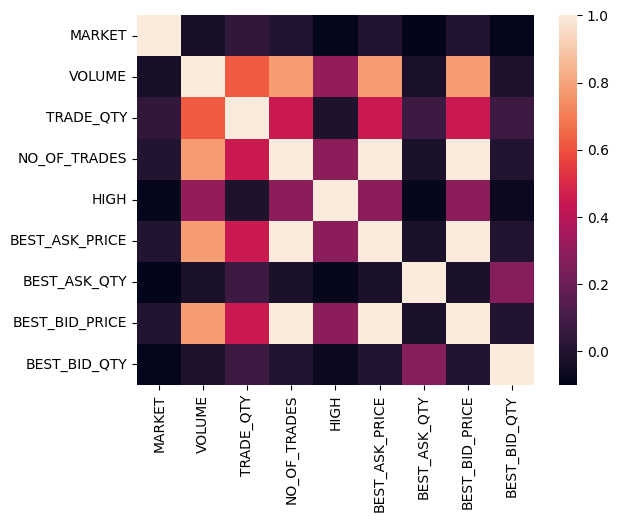

In [181]:
sns.heatmap(df_High.corr())
plt.show

## Data Frame LOW

In [182]:
df_Low= pd.read_csv('low.csv')

In [183]:
df_Low.head()

,TRADE_DATE,SEC_CODE,SYMBOL1,MARKET,VOLUME,TRADE_QTY,NO_OF_TRADES,LOW,BEST_ASK_PRICE,BEST_ASK_QTY,BEST_BID_PRICE,BEST_BID_QTY
0,01/02/2022,111001,JOIB,1,199083.73,54378,73,3.65,2.65,585.0,3.13,2000.0
1,01/02/2022,111002,JOKB,1,12707.76,9009,17,1.41,1.36,493.0,1.86,1570.0
2,01/02/2022,111003,JCBK,2,727.41,726,7,1.00,1.14,1853.0,1.64,1000.0
3,01/02/2022,111004,THBK,1,1558.10,394,5,3.95,1.09,660.0,1.59,46.0
4,01/02/2022,111006,SIBK,1,29030.98,14867,11,1.95,1.23,1000.0,1.73,333.0


In [184]:
df_Low.shape

(28012, 12)

In [185]:
df_Low.isnull().sum()

TRADE_DATE        0
SEC_CODE          0
SYMBOL1           0
MARKET            0
VOLUME            0
TRADE_QTY         0
NO_OF_TRADES      0
LOW               0
BEST_ASK_PRICE    0
BEST_ASK_QTY      0
BEST_BID_PRICE    0
BEST_BID_QTY      0
dtype: int64

In [186]:
df_Low.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28012 entries, 0 to 28011
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TRADE_DATE      28012 non-null  object 
 1   SEC_CODE        28012 non-null  int64  
 2   SYMBOL1         28012 non-null  object 
 3   MARKET          28012 non-null  int64  
 4   VOLUME          28012 non-null  float64
 5   TRADE_QTY       28012 non-null  int64  
 6   NO_OF_TRADES    28012 non-null  int64  
 7   LOW             28012 non-null  float64
 8   BEST_ASK_PRICE  28012 non-null  float64
 9   BEST_ASK_QTY    28012 non-null  float64
 10  BEST_BID_PRICE  28012 non-null  float64
 11  BEST_BID_QTY    28012 non-null  float64
dtypes: float64(6), int64(4), object(2)
memory usage: 2.6+ MB


In [187]:
df_Low["TRADE_DATE"] = pd.to_datetime(df_Low["TRADE_DATE"])
df_Low["TRADE_DATE"]

<ipython-input-187-750a3490d6b8>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_Low["TRADE_DATE"] = pd.to_datetime(df_Low["TRADE_DATE"])


0       2022-01-02
1       2022-01-02
2       2022-01-02
3       2022-01-02
4       2022-01-02
           ...    
28007   2022-10-31
28008   2022-10-31
28009   2022-10-31
28010   2022-10-31
28011   2022-10-31
Name: TRADE_DATE, Length: 28012, dtype: datetime64[ns]

In [188]:
df_Low.drop(['SEC_CODE'], axis=1, inplace=True)

In [189]:
df_Low.describe(include='all')

<ipython-input-189-0714e1a6feb5>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_Low.describe(include='all')


,TRADE_DATE,SYMBOL1,MARKET,VOLUME,TRADE_QTY,NO_OF_TRADES,LOW,BEST_ASK_PRICE,BEST_ASK_QTY,BEST_BID_PRICE,BEST_BID_QTY
count,28012,28012,28012.000000,2.801200e+04,2.801200e+04,28012.000000,28012.000000,28012.000000,2.801200e+04,28012.000000,2.801200e+04
unique,248,213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2022-03-13 00:00:00,JOIB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,135,247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2022-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2022-12-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.385906,6.312677e+04,4.270346e+04,28.061545,1.680022,1.620775,1.979999e+04,2.113421,2.452341e+04
std,NaN,NaN,0.750480,3.022558e+05,1.451785e+05,66.231007,4.580905,1.520599,6.742718e+04,1.500857,1.008184e+05
min,NaN,NaN,0.000000,2.000000e-02,1.000000e+00,1.000000,0.010000,1.000000,0.000000e+00,1.500000,0.000000e+00
25%,NaN,NaN,1.000000,6.398300e+02,1.000000e+03,3.000000,0.370000,1.050000,5.000000e+02,1.550000,4.000000e+02


In [190]:
df_Low.dtypes

TRADE_DATE        datetime64[ns]
SYMBOL1                   object
MARKET                     int64
VOLUME                   float64
TRADE_QTY                  int64
NO_OF_TRADES               int64
LOW                      float64
BEST_ASK_PRICE           float64
BEST_ASK_QTY             float64
BEST_BID_PRICE           float64
BEST_BID_QTY             float64
dtype: object

In [191]:
df_Low.nunique()

TRADE_DATE          248
SYMBOL1             213
MARKET                3
VOLUME            24466
TRADE_QTY         15430
NO_OF_TRADES        500
LOW                1007
BEST_ASK_PRICE      551
BEST_ASK_QTY      11371
BEST_BID_PRICE      551
BEST_BID_QTY      10083
dtype: int64

In [192]:
df_Low.corr()

<ipython-input-192-8507b38e7be9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_Low.corr()


,MARKET,VOLUME,TRADE_QTY,NO_OF_TRADES,LOW,BEST_ASK_PRICE,BEST_ASK_QTY,BEST_BID_PRICE,BEST_BID_QTY
MARKET,1.000000,-0.034048,0.045583,0.001102,-0.089948,0.001116,-0.099576,0.001093,-0.089226
VOLUME,-0.034048,1.000000,0.620277,0.777427,0.304766,0.777378,-0.026209,0.777434,-0.011380
TRADE_QTY,0.045583,0.620277,1.000000,0.449219,-0.014457,0.449198,0.080231,0.449170,0.075985
NO_OF_TRADES,0.001102,0.777427,0.449219,1.000000,0.283693,0.999997,-0.020228,0.999998,0.001323
LOW,-0.089948,0.304766,-0.014457,0.283693,1.000000,0.283831,-0.086282,0.283850,-0.070707
BEST_ASK_PRICE,0.001116,0.777378,0.449198,0.999997,0.283831,1.000000,-0.020253,0.999999,0.001313
BEST_ASK_QTY,-0.099576,-0.026209,0.080231,-0.020228,-0.086282,-0.020253,1.000000,-0.020260,0.271098
BEST_BID_PRICE,0.001093,0.777434,0.449170,0.999998,0.283850,0.999999,-0.020260,1.000000,0.001308
BEST_BID_QTY,-0.089226,-0.011380,0.075985,0.001323,-0.070707,0.001313,0.271098,0.001308,1.000000


<ipython-input-193-90ca6320c792>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_Low.corr())


<function matplotlib.pyplot.show(close=None, block=None)>

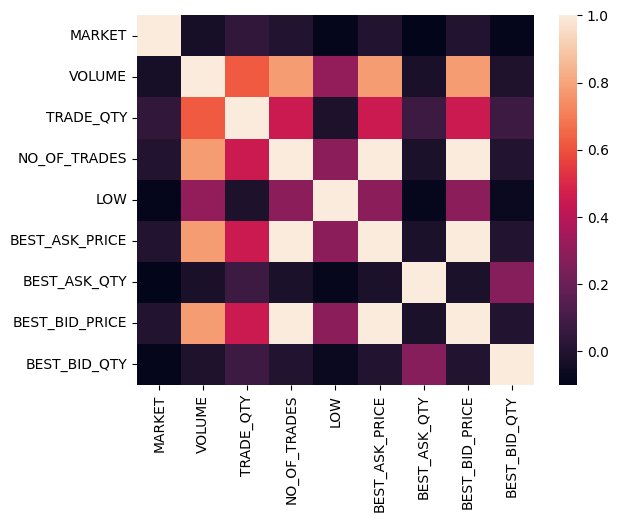

In [193]:
sns.heatmap(df_Low.corr())
plt.show

# visualization charts

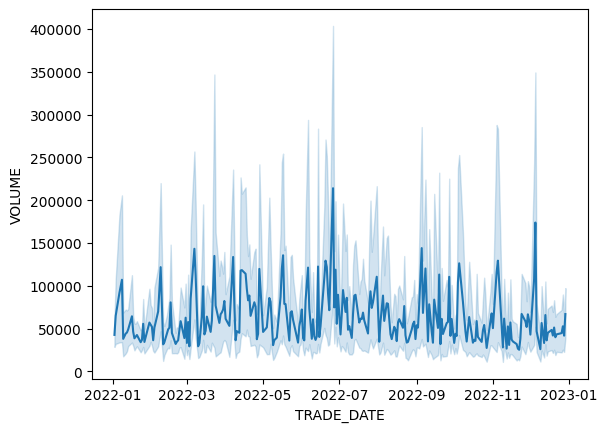

In [194]:
sns.lineplot(y=df_High['VOLUME'], x= df_High['TRADE_DATE'])
plt.show()

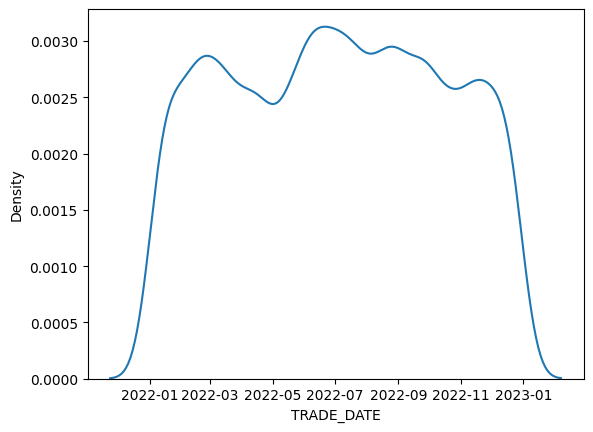

In [195]:
# Density plot
sns.kdeplot(df_High['TRADE_DATE'])
plt.show()

<Axes: xlabel='VOLUME', ylabel='TRADE_QTY'>

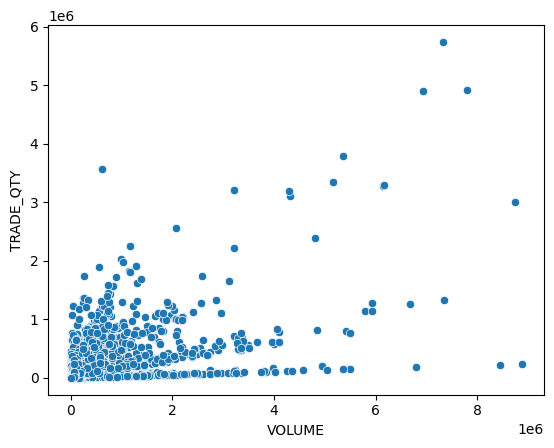

In [196]:
sns.scatterplot(x="VOLUME", y="TRADE_QTY", data=df_Low)

<Axes: xlabel='BEST_ASK_PRICE', ylabel='BEST_BID_PRICE'>

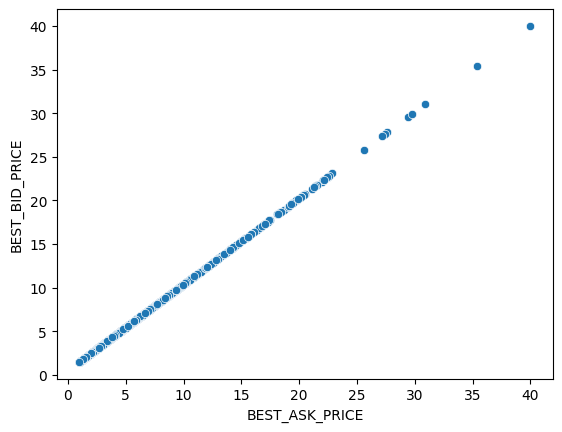

In [197]:
sns.scatterplot(x="BEST_ASK_PRICE", y="BEST_BID_PRICE", data=df_Low)

<Axes: xlabel='NO_OF_TRADES', ylabel='VOLUME'>

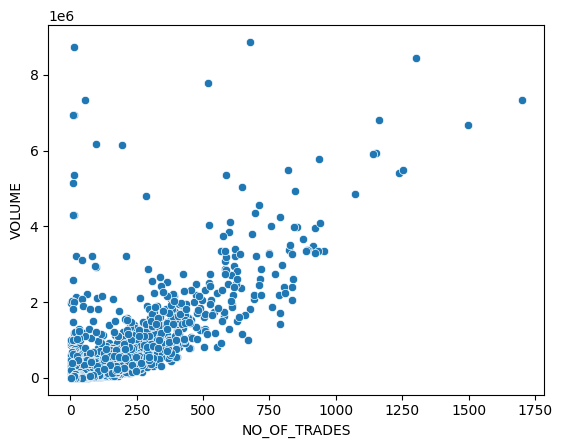

In [198]:
sns.scatterplot(x="NO_OF_TRADES", y="VOLUME", data=df_High)

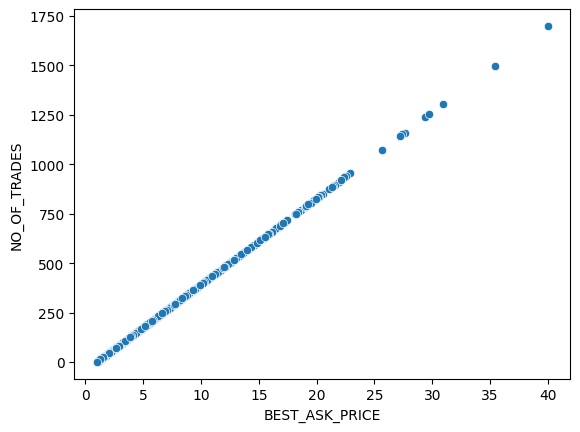

In [199]:
sns.scatterplot(x="BEST_ASK_PRICE", y="NO_OF_TRADES", data=df_High)
plt.show()

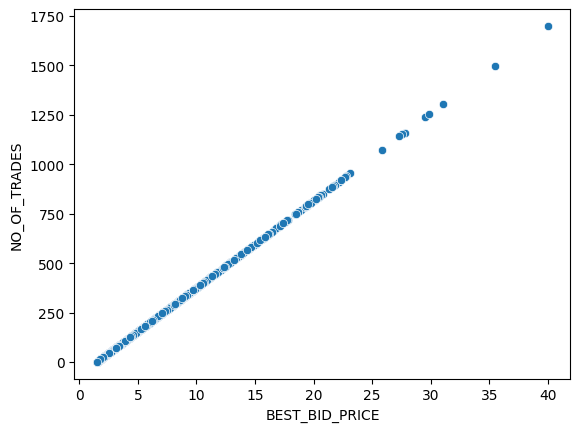

In [200]:
sns.scatterplot(x="BEST_BID_PRICE", y="NO_OF_TRADES", data=df_High)
plt.show()

<Axes: xlabel='MARKET', ylabel='TRADE_QTY'>

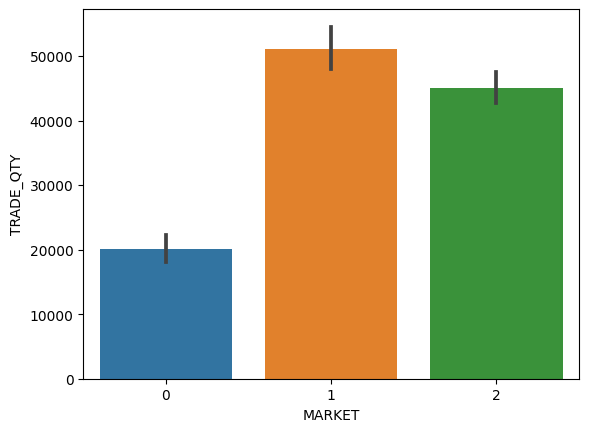

In [201]:
sns.barplot(x= df_High['MARKET'], y= df_High['TRADE_QTY'])

# 1. Apply Python programming language to demonstrate the descriptive analytics techniques by applying the following:

## a. Analyze at least three features by using appropriate measures and visualization charts

Appropriate measures

### Frequency and relative and cumulative

In [202]:
frequency = df_High['MARKET'].value_counts()
df_by_market = df_High.groupby('MARKET').size().reset_index(name='frequency')
relative_frequency = frequency / len(df_High)
df_by_market['relative_frequency'] = df_by_market['frequency'] / len(df_High)
cumulative_frequency = frequency.cumsum()
df_by_market['cumulative_frequency'] = df_by_market['frequency'].cumsum()
cumulative_frequency_relative = cumulative_frequency / len(df_High)
df_by_market['cumulative_relative_frequency'] = df_by_market['cumulative_frequency'] / len(df_High)
quartiles = frequency.quantile([0.25, 0.5, 0.75])
complaints_quartile = pd.cut(frequency,bins=3,labels=(['Q1', 'Q2', 'Q3']))
quartiles = df_by_market['frequency'].quantile([0.25, 0.5, 0.75])
df_by_market['quartile'] = pd.cut(df_by_market['frequency'], bins=3, labels=(['Q1', 'Q2', 'Q3']))
df_by_market

,MARKET,frequency,relative_frequency,cumulative_frequency,cumulative_relative_frequency,quartile
0,0,4569,0.163109,4569,0.163109,Q1
1,1,8064,0.287877,12633,0.450985,Q1
2,2,15379,0.549015,28012,1.000000,Q3


<Axes: >

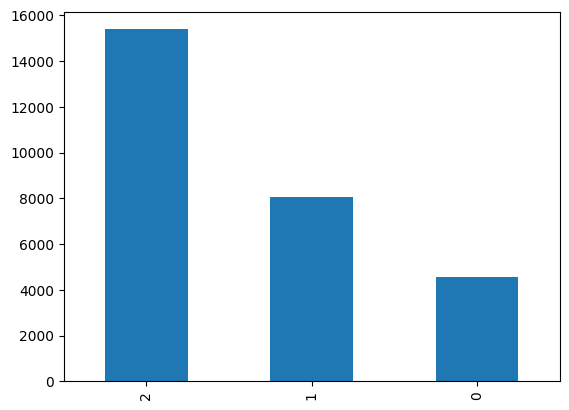

In [203]:
frequency.plot(kind='bar')

<Axes: >

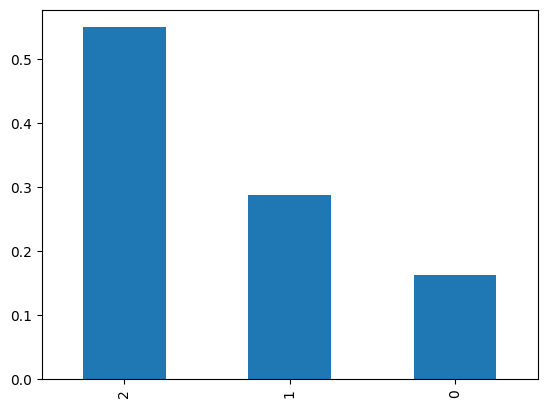

In [204]:
relative_frequency.plot(kind='bar')

<Axes: >

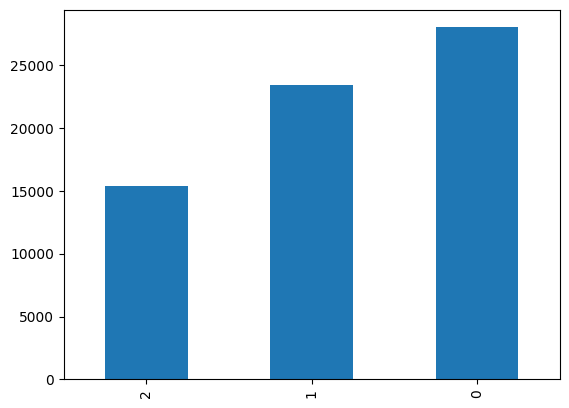

In [205]:
cumulative_frequency.plot(kind='bar')

<Axes: >

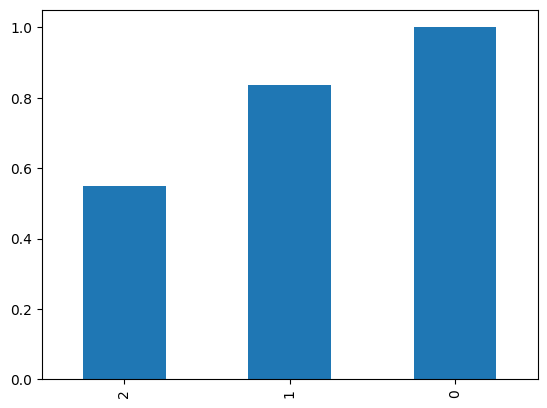

In [206]:
cumulative_frequency_relative.plot(kind='bar')

<Axes: >

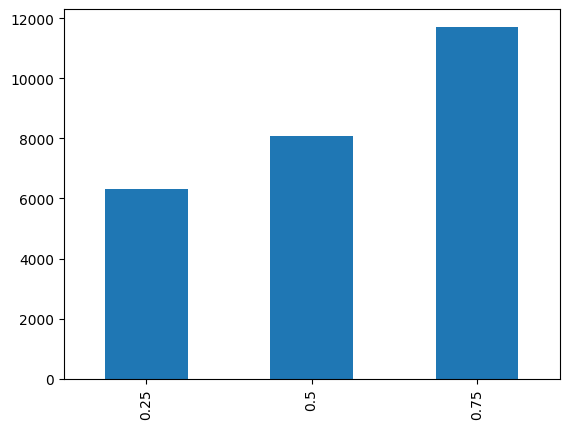

In [207]:
quartiles.plot(kind='bar')

### Feature "VOLUME"

In [208]:
df_High['VOLUME'].describe()

count    2.801200e+04
mean     6.312677e+04
std      3.022558e+05
min      2.000000e-02
25%      6.398300e+02
50%      3.831125e+03
75%      2.014495e+04
max      8.868824e+06
Name: VOLUME, dtype: float64

In [209]:
mean_volume = df_High['VOLUME'].mean()
mean_volume

63126.7665386263

In [210]:
median_volume = df_High['VOLUME'].median()
median_volume

3831.125

In [211]:
mode_volume = df_High['VOLUME'].mode()
mode_volume

0    12.0
Name: VOLUME, dtype: float64

In [212]:
variance_volume = df_High['VOLUME'].var()
variance_volume

91358547240.11235

In [213]:
standard_deviation_volume = df_High['VOLUME'].std()
standard_deviation_volume

302255.764610226

In [214]:
range_val_volume = df_High['VOLUME'].max() - df_High['VOLUME'].min()
range_val_volume

8868824.35

In [215]:
coefficient_volume = (df_High['VOLUME'].std() / df_High['VOLUME'].mean())*100
coefficient_volume

478.80761392282034

In [216]:
iqr_volume = df_High['VOLUME'].quantile(0.75) - df_High['VOLUME'].quantile(0.25)
iqr_volume

19505.1175

In [217]:
percentiles_volume = np.percentile(df_High['VOLUME'], [10, 60, 90])
print("10th Percentile: ", percentiles_volume[0])
print("60th Percentile: ", percentiles_volume[1])
print("90th Percentile: ", percentiles_volume[2])

10th Percentile:  106.0
60th Percentile:  7200.084
90th Percentile:  104599.539


In [218]:
quartiles_volume = df_High['VOLUME'].quantile([0.25, 0.5, 0.75])
print("25th Quartile: ", quartiles_volume[0.25])
print("50th Quartile: ", quartiles_volume[0.5])
print("75th Quartile: ", quartiles_volume[0.75])

25th Quartile:  639.83
50th Quartile:  3831.125
75th Quartile:  20144.947500000002


In [219]:
deciles_volume = np.percentile(df_High['VOLUME'], np.arange(10, 100, 10))
for i, deciles_volume in enumerate(deciles_volume):
    print(f"{(i+1)*10}th Decile: {deciles_volume}")

10th Decile: 106.0
20th Decile: 398.42000000000013
30th Decile: 969.9509999999999
40th Decile: 1963.3320000000008
50th Decile: 3831.125
60th Decile: 7200.084
70th Decile: 13742.003999999992
80th Decile: 30822.476000000006
90th Decile: 104599.539


In [220]:
df_High['z_score_volume'] = (df_High['VOLUME'] - mean_volume) / standard_deviation_volume
df_High['z_score_volume']

0        0.449808
1       -0.166809
2       -0.206446
3       -0.203697
4       -0.112804
           ...   
28007    3.184001
28008   -0.208340
28009   -0.018857
28010   -0.205097
28011    2.838261
Name: z_score_volume, Length: 28012, dtype: float64

In [221]:
Outliers_volume = df_High[(df_High['z_score_volume'] > 0.5) | (df_High['z_score_volume'] < -0.5)]['z_score_volume']
Outliers_volume

13       0.725648
22       0.986417
84       1.024246
101      1.568246
117      0.865473
           ...   
27978    1.122676
27984    4.065568
27992    0.568882
28007    3.184001
28011    2.838261
Name: z_score_volume, Length: 1725, dtype: float64

In [222]:
Outliers_volume.value_counts()

0.725648    1
5.818991    1
0.565416    1
0.917244    1
1.484387    1
           ..
1.134205    1
4.406408    1
0.500574    1
0.629255    1
2.838261    1
Name: z_score_volume, Length: 1725, dtype: int64

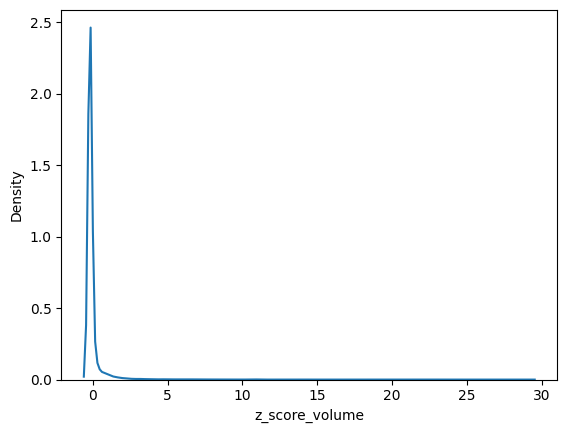

In [223]:
sns.kdeplot(df_High['z_score_volume'])
plt.show()

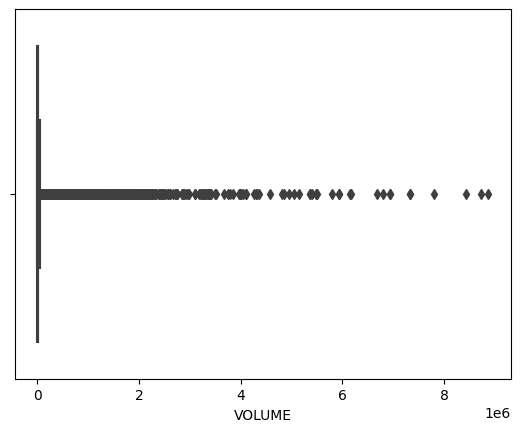

In [224]:
sns.boxplot(x=df_High['VOLUME'])
plt.show()

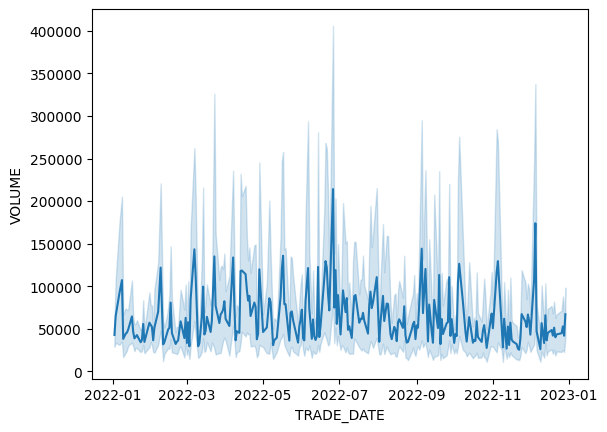

In [225]:
sns.lineplot(y=df_High['VOLUME'],x=df_High['TRADE_DATE'])
plt.show()

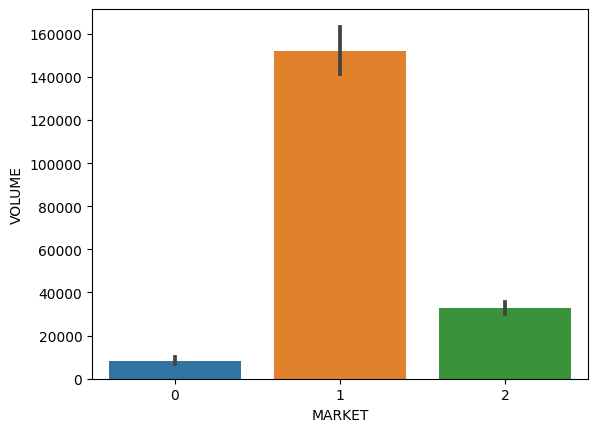

In [226]:
sns.barplot(y=df_High['VOLUME'],x=df_High['MARKET'])
plt.show()

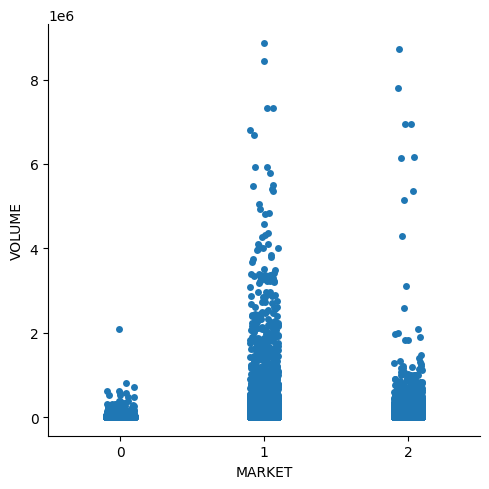

In [227]:
sns.catplot(y=df_High['VOLUME'],x=df_High['MARKET'])
plt.show()

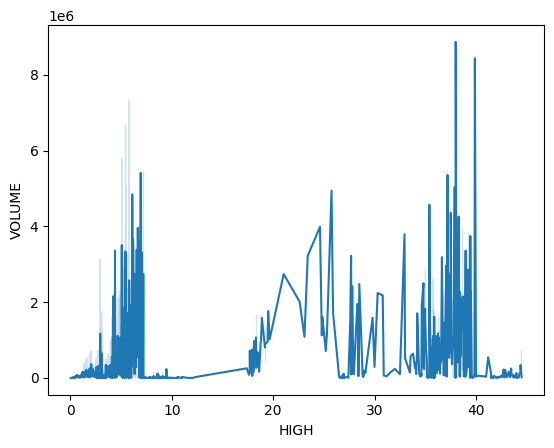

In [228]:
sns.lineplot(y=df_High['VOLUME'],x=df_High['HIGH'])
plt.show()

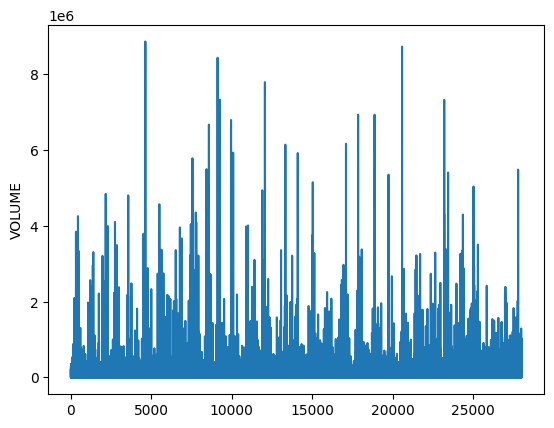

In [229]:
sns.lineplot(df_High['VOLUME'])
plt.show()

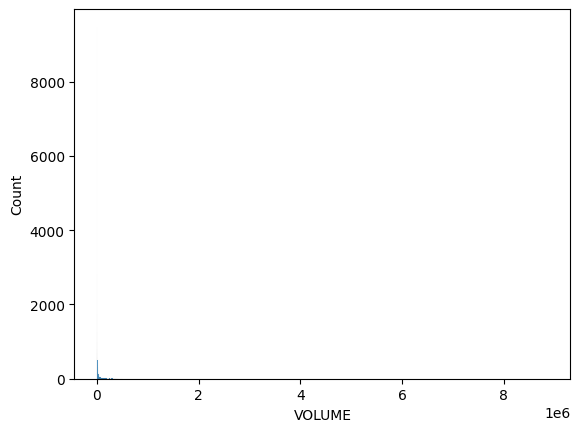

In [230]:
sns.histplot(x=df_High['VOLUME'])

plt.show()

### Feature "TRADE_QTY"

In [231]:
df_High['TRADE_QTY'].describe()

count    2.801200e+04
mean     4.270346e+04
std      1.451785e+05
min      1.000000e+00
25%      1.000000e+03
50%      5.873500e+03
75%      2.843675e+04
max      5.741963e+06
Name: TRADE_QTY, dtype: float64

In [232]:
mean_trade_qty = df_High['TRADE_QTY'].mean()
mean_trade_qty

42703.4618734828

In [233]:
median_trade_qty = df_High['TRADE_QTY'].median()
median_trade_qty

5873.5

In [234]:
mode_trade_qty = df_High['TRADE_QTY'].mode()
mode_trade_qty

0    1000
Name: TRADE_QTY, dtype: int64

In [235]:
variance_trade_qty = df_High['TRADE_QTY'].var()
variance_trade_qty

21076797708.364723

In [236]:
standard_deviation_trade_qty = df_High['TRADE_QTY'].std()
standard_deviation_trade_qty

145178.50291404966

In [237]:
range_trade_qty = df_High['TRADE_QTY'].max() - df_High['TRADE_QTY'].min()
range_trade_qty

5741962

In [238]:
coefficient_trade_qty = (df_High['TRADE_QTY'].std() / df_High['TRADE_QTY'].mean())*100
coefficient_trade_qty

339.9689311938429

In [239]:
iqr_trade_qty = df_High['TRADE_QTY'].quantile(0.75) - df_High['TRADE_QTY'].quantile(0.25)
iqr_trade_qty

27436.75

In [240]:
percentiles_trade_qty = np.percentile(df_High['TRADE_QTY'], [10, 60, 90])
print("10th Percentile: ", percentiles_trade_qty[0])
print("60th Percentile: ", percentiles_trade_qty[1])
print("90th Percentile: ", percentiles_trade_qty[2])

10th Percentile:  200.0
60th Percentile:  11020.0
90th Percentile:  97303.70000000007


In [241]:
quartiles_trade_qty = df_High['TRADE_QTY'].quantile([0.25, 0.5, 0.75])
print("25th Quartile: ", quartiles_trade_qty[0.25])
print("50th Quartile: ", quartiles_trade_qty[0.5])
print("75th Quartile: ", quartiles_trade_qty[0.75])

25th Quartile:  1000.0
50th Quartile:  5873.5
75th Quartile:  28436.75


In [242]:
deciles_trade_qty = np.percentile(df_High['TRADE_QTY'], np.arange(10, 100, 10))
for i, deciles_trade_qty in enumerate(deciles_trade_qty):
    print(f"{(i+1)*10}th Decile: {deciles_trade_qty}")

10th Decile: 200.0
20th Decile: 600.0
30th Decile: 1425.0
40th Decile: 3000.0
50th Decile: 5873.5
60th Decile: 11020.0
70th Decile: 20372.499999999985
80th Decile: 40334.8
90th Decile: 97303.70000000007


In [243]:
df_High['z_score_trade_qty'] = (df_High['TRADE_QTY'] - mean_trade_qty) / standard_deviation_trade_qty
df_High['z_score_trade_qty']

0         0.080415
1        -0.232090
2        -0.289144
3        -0.291431
4        -0.191740
           ...    
28007    13.356127
28008    -0.291010
28009    -0.223363
28010    -0.290700
28011     0.882531
Name: z_score_trade_qty, Length: 28012, dtype: float64

In [244]:
Outliers_trade_qty = df_High[(df_High['z_score_trade_qty'] > 0.5) | (df_High['z_score_trade_qty'] < -0.5)]['z_score_trade_qty']
Outliers_trade_qty

12        0.858223
22        1.816306
25        0.597971
34        0.925313
36        1.177850
           ...    
27950     1.379788
27978     2.106004
27992     3.158164
28007    13.356127
28011     0.882531
Name: z_score_trade_qty, Length: 2386, dtype: float64

In [245]:
Outliers_trade_qty.value_counts()

0.828680    2
1.438274    2
0.528980    2
1.255672    2
0.601181    2
           ..
0.767920    1
1.414345    1
1.950540    1
8.824513    1
0.882531    1
Name: z_score_trade_qty, Length: 2373, dtype: int64

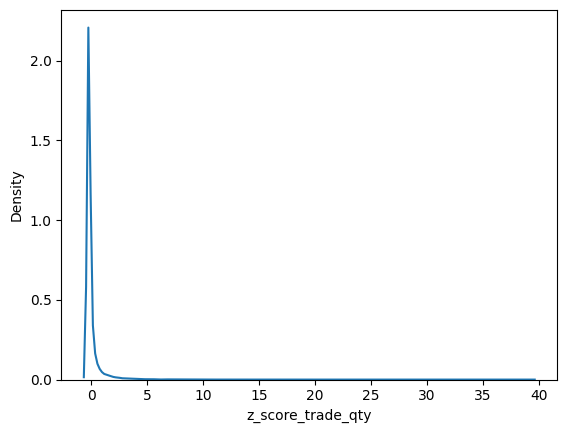

In [246]:
sns.kdeplot(df_High['z_score_trade_qty'])
plt.show()

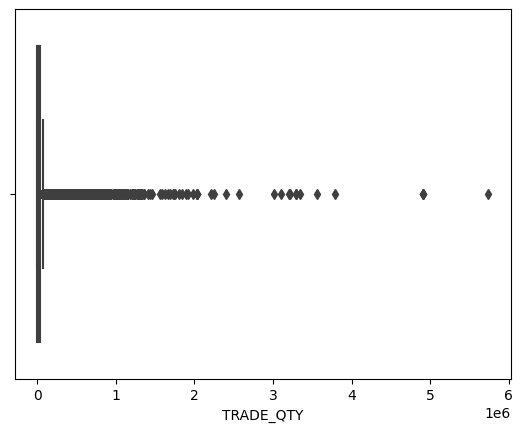

In [247]:
sns.boxplot(x=df_High['TRADE_QTY'])
plt.show()

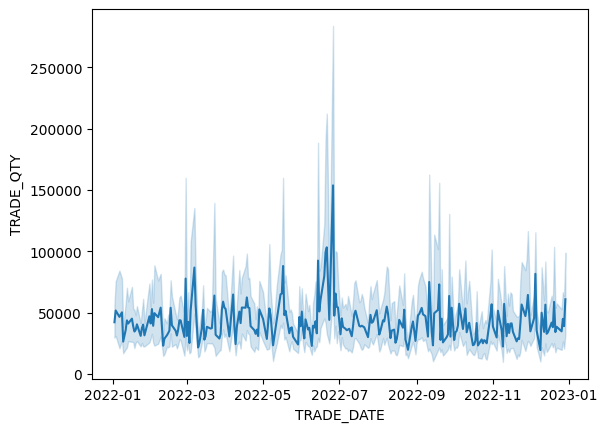

In [248]:
sns.lineplot(y=df_High['TRADE_QTY'],x=df_High['TRADE_DATE'])
plt.show()

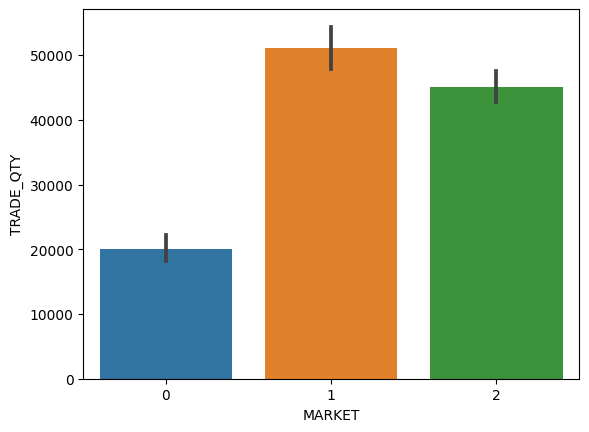

In [249]:
sns.barplot(y=df_High['TRADE_QTY'],x=df_High['MARKET'])
plt.show()

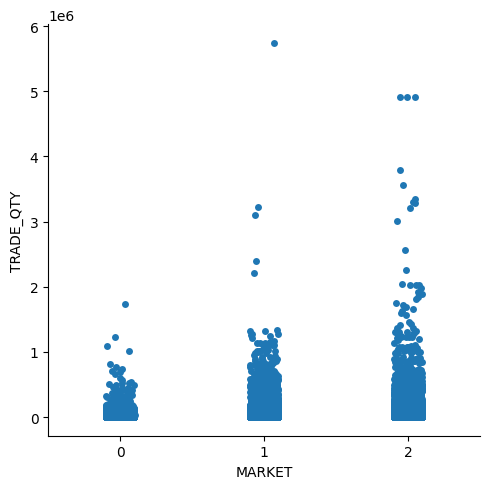

In [250]:
sns.catplot(y=df_High['TRADE_QTY'],x=df_High['MARKET'])
plt.show()

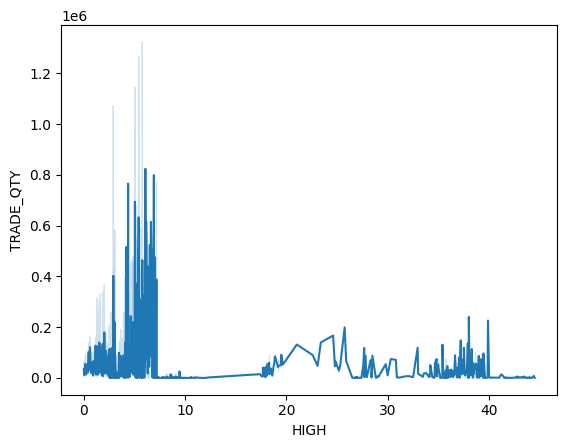

In [251]:
sns.lineplot(y=df_High['TRADE_QTY'],x=df_High['HIGH'])
plt.show()

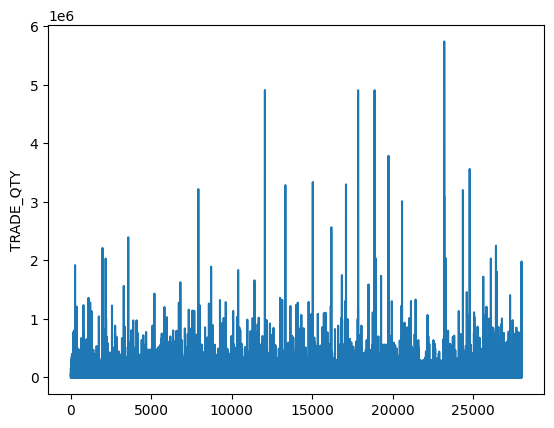

In [252]:
sns.lineplot(df_High['TRADE_QTY'])
plt.show()

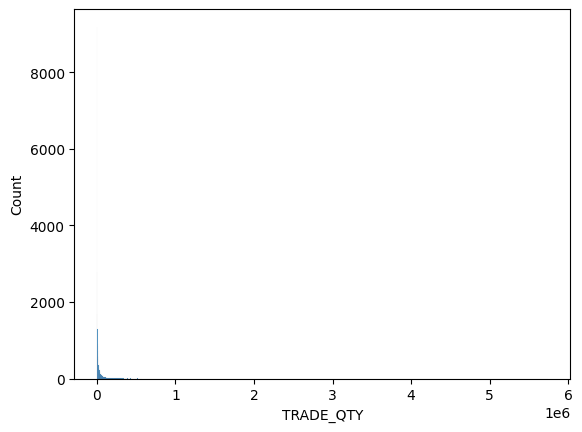

In [253]:
sns.histplot(x=df_High['TRADE_QTY'])
plt.show()

### Feature "BEST_BID_QTY"

In [254]:
df_High['BEST_BID_QTY'].describe()

count    2.801200e+04
mean     2.452341e+04
std      1.008184e+05
min      0.000000e+00
25%      4.000000e+02
50%      1.912000e+03
75%      1.038675e+04
max      3.600734e+06
Name: BEST_BID_QTY, dtype: float64

In [255]:
mean_best_bid_qty = df_High['BEST_BID_QTY'].mean()
mean_best_bid_qty

24523.4121090961

In [256]:
median_best_bid_qty = df_High['BEST_BID_QTY'].median()
median_best_bid_qty

1912.0

In [257]:
mode_best_bid_qty = df_High['BEST_BID_QTY'].mode()
mode_best_bid_qty

0    1000.0
Name: BEST_BID_QTY, dtype: float64

In [258]:
variance_best_bid_qty = df_High['BEST_BID_QTY'].var()
variance_best_bid_qty

10164342907.438026

In [259]:
standard_deviation_best_bid_qty = df_High['BEST_BID_QTY'].std()
standard_deviation_best_bid_qty

100818.3659232683

In [260]:
range_val_best_bid_qty = df_High['BEST_BID_QTY'].max() - df_High['BEST_BID_QTY'].min()
range_val_best_bid_qty

3600734.0

In [261]:
coefficient_best_bid_qty = (df_High['BEST_BID_QTY'].std() / df_High['BEST_BID_QTY'].mean())*100
coefficient_best_bid_qty

411.11067854164247

In [262]:
iqr_best_bid_qty = df_High['BEST_BID_QTY'].quantile(0.75) - df_High['BEST_BID_QTY'].quantile(0.25)
iqr_best_bid_qty

9986.75

In [263]:
percentiles_best_bid_qty = np.percentile(df_High['BEST_BID_QTY'], [10, 60, 90])
print("10th Percentile: ", percentiles_best_bid_qty[0])
print("60th Percentile: ", percentiles_best_bid_qty[1])
print("90th Percentile: ", percentiles_best_bid_qty[2])

10th Percentile:  100.0
60th Percentile:  3383.19999999999
90th Percentile:  48319.10000000001


In [264]:
quartiles_best_bid_qty = df_High['BEST_BID_QTY'].quantile([0.25, 0.5, 0.75])
print("25th Quartile: ", quartiles_best_bid_qty[0.25])
print("50th Quartile: ", quartiles_best_bid_qty[0.5])
print("75th Quartile: ", quartiles_best_bid_qty[0.75])

25th Quartile:  400.0
50th Quartile:  1912.0
75th Quartile:  10386.75


In [265]:
deciles_best_bid_qty = np.percentile(df_High['BEST_BID_QTY'], np.arange(10, 100, 10))
for i, deciles_best_bid_qty in enumerate(deciles_best_bid_qty):
    print(f"{(i+1)*10}th Decile: {deciles_best_bid_qty}")

10th Decile: 100.0
20th Decile: 250.0
30th Decile: 500.0
40th Decile: 1000.0
50th Decile: 1912.0
60th Decile: 3383.19999999999
70th Decile: 6754.699999999997
80th Decile: 16148.200000000026
90th Decile: 48319.10000000001


In [266]:
df_High['z_score_best_bid_qty'] = (df_High['BEST_BID_QTY'] - mean_best_bid_qty) / standard_deviation_best_bid_qty
df_High['z_score_best_bid_qty']

0       -0.223406
1       -0.227671
2       -0.233325
3       -0.242787
4       -0.239941
           ...   
28007   -0.243243
28008   -0.097338
28009   -0.243243
28010   -0.238284
28011   -0.243045
Name: z_score_best_bid_qty, Length: 28012, dtype: float64

In [267]:
Outliers_best_bid_qty = df_High[(df_High['z_score_best_bid_qty'] > 0.5) | (df_High['z_score_best_bid_qty'] < -0.5)]['z_score_best_bid_qty']
Outliers_best_bid_qty

19       2.332180
22       1.601043
42       6.456091
46       6.016231
74       0.538509
           ...   
27953    3.817832
27954    0.536128
27963    6.952559
27964    0.806972
28002    1.556736
Name: z_score_best_bid_qty, Length: 1954, dtype: float64

In [268]:
Outliers_best_bid_qty.value_counts()

0.748639    8
0.713923    4
1.479151    4
1.055081    4
0.776511    3
           ..
1.144827    1
0.565439    1
0.654172    1
0.521488    1
1.556736    1
Name: z_score_best_bid_qty, Length: 1843, dtype: int64

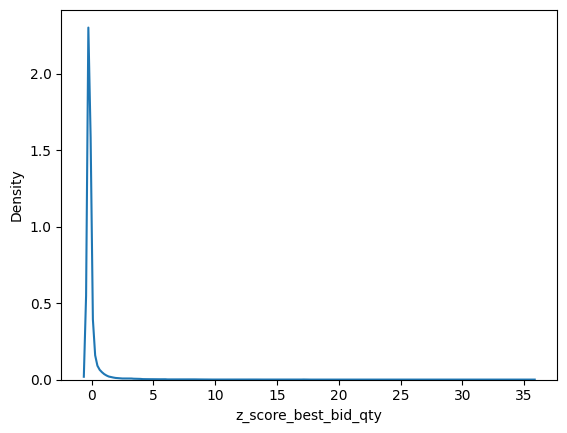

In [269]:
sns.kdeplot(df_High['z_score_best_bid_qty'])
plt.show()

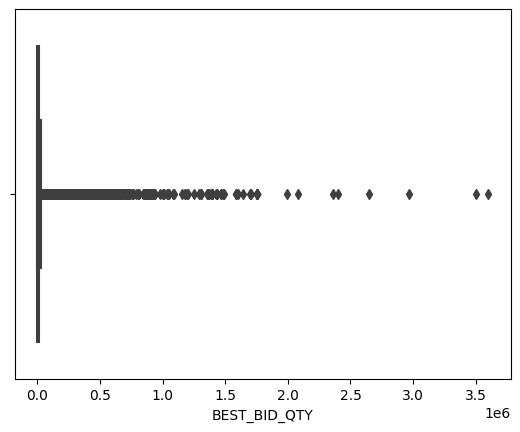

In [270]:
sns.boxplot(x=df_High['BEST_BID_QTY'])
plt.show()

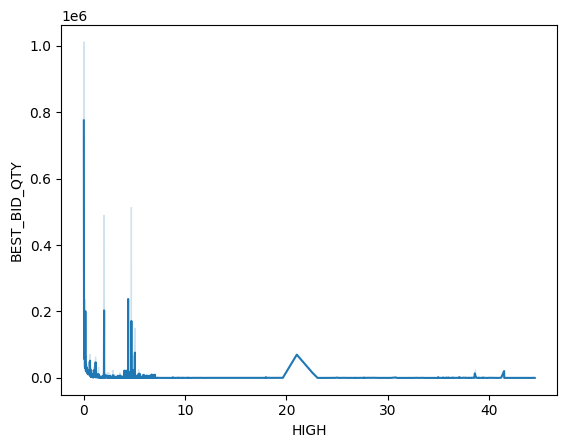

In [271]:
sns.lineplot(y=df_High['BEST_BID_QTY'],x=df_High['HIGH'])
plt.show()

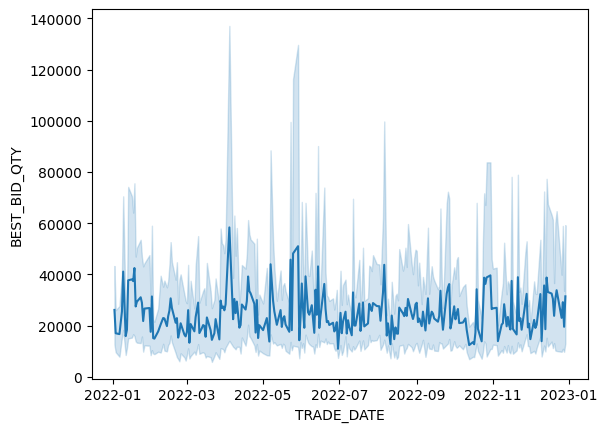

In [272]:
sns.lineplot(y=df_High['BEST_BID_QTY'],x=df_High['TRADE_DATE'])
plt.show()

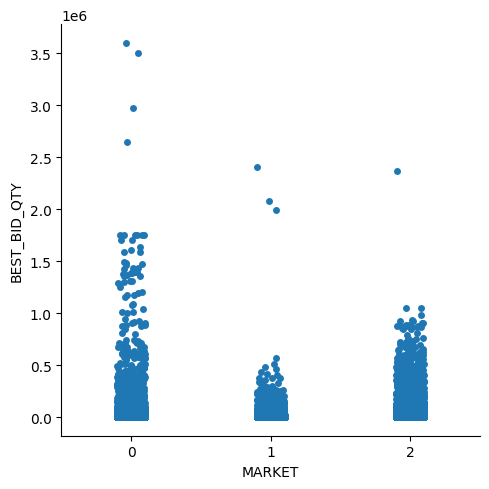

In [273]:
sns.catplot(y=df_High['BEST_BID_QTY'],x=df_High['MARKET'])
plt.show()

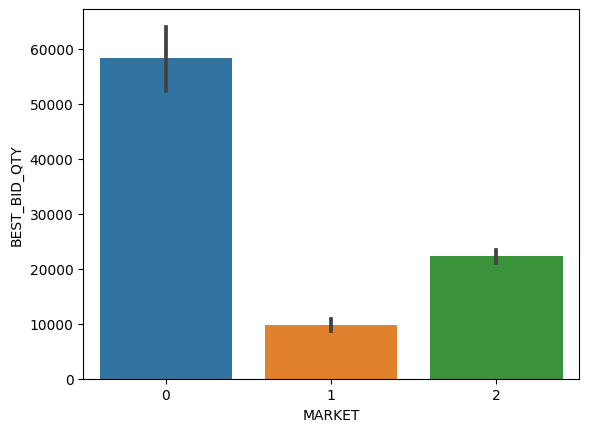

In [274]:
sns.barplot(y=df_High['BEST_BID_QTY'],x=df_High['MARKET'])
plt.show()

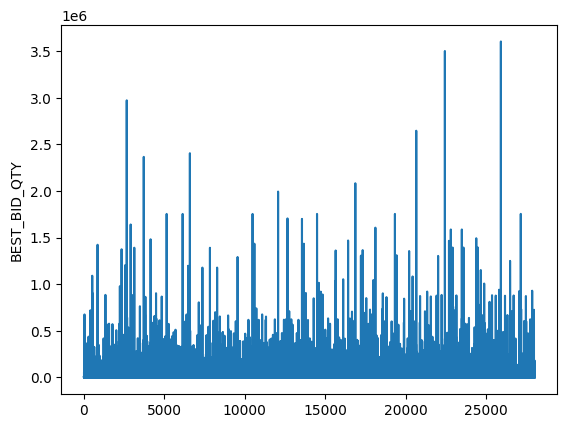

In [275]:
sns.lineplot(df_High['BEST_BID_QTY'])
plt.show()

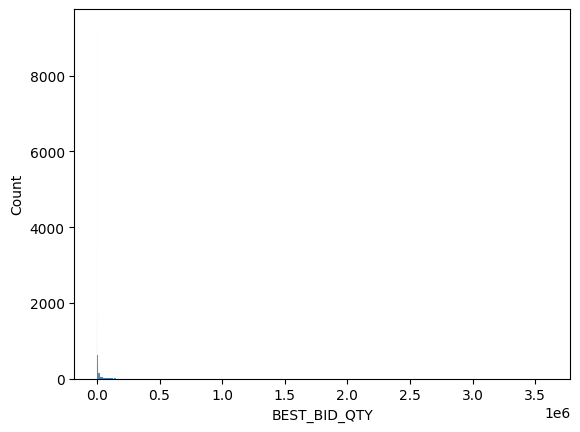

In [276]:
sns.histplot(x=df_High['BEST_BID_QTY'])
plt.show()

## b. Using a contingency table and association measures, find an association between at least two features

In [277]:
contingency_table = pd.crosstab(
    index=df_High['MARKET'],
    columns=df_High['SYMBOL1'],
    margins=True
)
contingency_table

SYMBOL1,AAIN,AALU,ABCO,ABLA,ABMS,ABUS,ACDT,AEIN,AEIV,AHLI,...,UNAI,UNIN,UTOB,VFED,WIRE,WIVA,WOOD,ZARA,ZEIC,All
MARKET,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,190,0,0,0,169,0,0,...,0,0,0,0,0,0,2,0,0,4569
1,33,89,197,0,0,0,0,0,0,247,...,0,16,0,0,0,0,0,0,108,8064
2,0,26,0,0,14,223,128,0,214,0,...,246,0,195,60,205,175,0,106,0,15379
All,33,115,197,190,14,223,128,169,214,247,...,246,16,195,60,205,175,2,106,108,28012


In [278]:
# Calculate marginal totals for each variable
marginal_totals_High = df_High[['MARKET', 'VOLUME', 'TRADE_QTY', 'NO_OF_TRADES', 'HIGH', 'BEST_ASK_PRICE', 'BEST_ASK_QTY', 'BEST_BID_PRICE', 'BEST_BID_QTY']].sum()
marginal_totals_High

MARKET            3.882200e+04
VOLUME            1.768307e+09
TRADE_QTY         1.196209e+09
NO_OF_TRADES      7.860600e+05
HIGH              4.800740e+04
BEST_ASK_PRICE    4.540116e+04
BEST_ASK_QTY      5.546373e+08
BEST_BID_PRICE    5.920116e+04
BEST_BID_QTY      6.869498e+08
dtype: float64

In [279]:
# Calculate row percentages
row_percentages = df_High[['MARKET', 'VOLUME', 'TRADE_QTY', 'NO_OF_TRADES', 'HIGH', 'BEST_ASK_PRICE', 'BEST_ASK_QTY', 'BEST_BID_PRICE', 'BEST_BID_QTY']].apply(lambda x: x.value_counts(normalize=True) * 100)
row_percentages

,MARKET,VOLUME,TRADE_QTY,NO_OF_TRADES,HIGH,BEST_ASK_PRICE,BEST_ASK_QTY,BEST_BID_PRICE,BEST_BID_QTY
0.00,16.310867,NaN,NaN,NaN,NaN,NaN,0.453377,NaN,1.842068
0.02,NaN,0.00714,NaN,NaN,0.217764,NaN,NaN,NaN,NaN
0.03,NaN,0.00714,NaN,NaN,0.435528,NaN,NaN,NaN,NaN
0.04,NaN,0.01428,NaN,NaN,0.835356,NaN,NaN,NaN,NaN
0.05,NaN,NaN,NaN,NaN,0.189205,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
7333132.22,NaN,0.00357,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7795035.95,NaN,0.00357,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8438649.83,NaN,0.00357,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8733137.45,NaN,0.00357,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [280]:
# Calculate average satisfaction rating
average_satisfaction = df_High[['MARKET', 'VOLUME', 'TRADE_QTY', 'NO_OF_TRADES', 'HIGH', 'BEST_ASK_PRICE', 'BEST_ASK_QTY', 'BEST_BID_PRICE', 'BEST_BID_QTY']].mean().mean()
print("Average Satisfaction Rating:", average_satisfaction)

Average Satisfaction Rating: 16687.613808367845


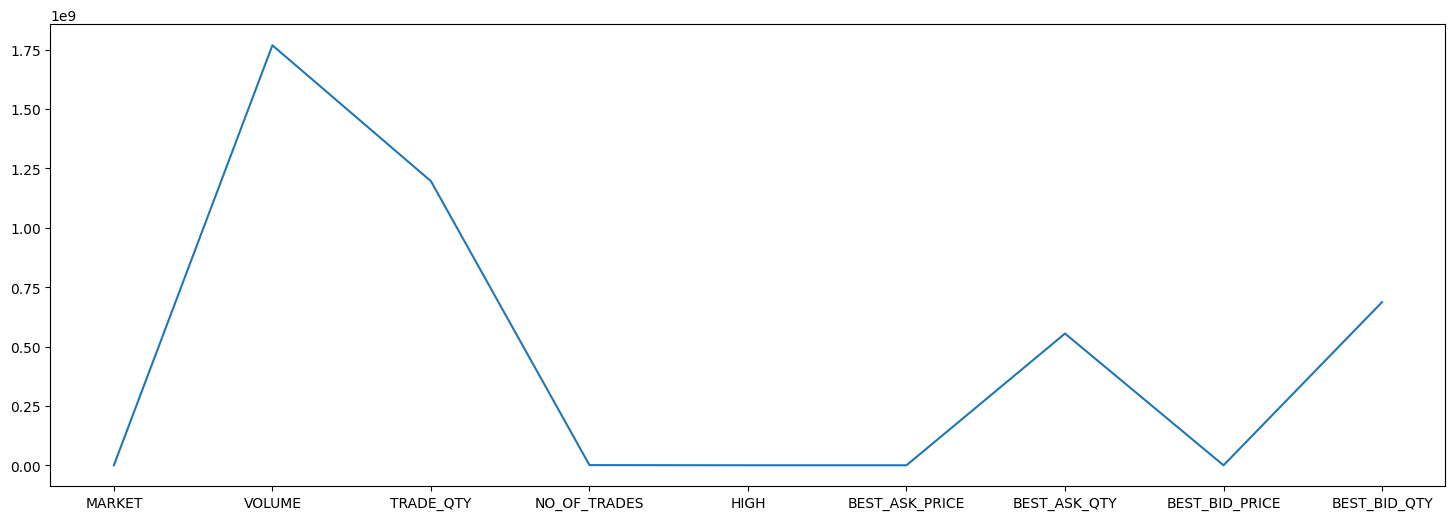

In [281]:
value, x = plt.subplots(figsize=(18,6))
x = marginal_totals_High.plot()
plt.show()

# 2. Apply Python programming language to demonstrate these predictive analytic techniques by applying the following:

### a. Apply a feature selection technique to find the best features that help the model achieve the best stock price prediction.

### Removing features with low variance method (HIGH)

In [282]:
feature_vector1=df_High.drop(["HIGH","TRADE_DATE","SYMBOL1","z_score_volume",	"z_score_trade_qty",	"z_score_best_bid_qty"], axis=1)
target_vector1=df_High["HIGH"]

In [283]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(feature_vector1, target_vector1, test_size=0.3, random_state=0)

variances1 = feature_vector1.var()

selector1 = VarianceThreshold()

selector1.fit(X_train1)

selected_features1 = feature_vector1.columns[selector1.get_support()]

print("Selected Features and Variance:")
for feature in selected_features1:
    print(feature,": ",variances1[feature])

X_train_selected1 = X_train1[selected_features1]
X_test_selected1 = X_test1[selected_features1]

reg1 = LinearRegression().fit(X_train_selected1, y_train1)

y_pred1 = reg1.predict(X_test_selected1)

mae1 = mean_absolute_error(y_test1, y_pred1)
mse1 = mean_squared_error(y_test1, y_pred1)
rmse1 = mean_squared_error(y_test1, y_pred1, squared=False)
r21 = r2_score(y_test1, y_pred1)

print("\nSelected features:", feature_vector1.columns[selector1.get_support()])
print("\nRegression Metrics:")
print("MAE:", mae1)
print("MSE:", mse1)
print("RMSE:", rmse1)
print("R2:", r21)

Selected Features and Variance:
MARKET :  0.5632200101637923
VOLUME :  91358547240.11235
TRADE_QTY :  21076797708.364723
NO_OF_TRADES :  4386.546281686843
BEST_ASK_PRICE :  2.312222768151919
BEST_ASK_QTY :  4546424799.745177
BEST_BID_PRICE :  2.252571193242034
BEST_BID_QTY :  10164342907.438026

Selected features: Index(['MARKET', 'VOLUME', 'TRADE_QTY', 'NO_OF_TRADES', 'BEST_ASK_PRICE',
       'BEST_ASK_QTY', 'BEST_BID_PRICE', 'BEST_BID_QTY'],
      dtype='object')

Regression Metrics:
MAE: 1.5412383207731222
MSE: 18.70069945256504
RMSE: 4.324430535060662
R2: 0.17205328352335436


### SelectKBest method (HIGH)

In [284]:
from sklearn.feature_selection import SelectKBest, f_regression
# split the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(feature_vector1, target_vector1, test_size=0.3, random_state=0)

# instantiate the feature selection model
selector2 = SelectKBest(f_regression, k=8)

# fit the model on the training data
selector2.fit(X_train2, y_train2)

# transform the training and testing sets to keep only the selected features
X_train_selected2 = selector2.transform(X_train2)
X_test_selected2 = selector2.transform(X_test2)

# train a linear regression model on the selected features
model2 = LinearRegression()
model2.fit(X_train_selected2, y_train2)

# make predictions on the testing set
y_pred2 = model2.predict(X_test_selected2)

# calculate regression metrics
mae2 = mean_absolute_error(y_test2, y_pred2)
mse2 = mean_squared_error(y_test2, y_pred2)
rmse2 = mean_squared_error(y_test2, y_pred2, squared=False)
r22 = r2_score(y_test2, y_pred2)

# print the selected features and regression metrics
print("Selected features:", feature_vector1.columns[selector2.get_support()],"\n")
print("MAE:", mae2)
print("MSE:", mse2)
print("RMSE:", rmse2)
print("R2:", r22)

Selected features: Index(['MARKET', 'VOLUME', 'TRADE_QTY', 'NO_OF_TRADES', 'BEST_ASK_PRICE',
       'BEST_ASK_QTY', 'BEST_BID_PRICE', 'BEST_BID_QTY'],
      dtype='object') 

MAE: 1.5412383207731222
MSE: 18.70069945256504
RMSE: 4.324430535060662
R2: 0.17205328352335436


### Sequential Feature Selection (HIGH)

In [285]:
from sklearn.feature_selection import SequentialFeatureSelector

# Split the dataset into training and testing sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(feature_vector1,target_vector1, test_size=0.3, random_state=0)

model3 = LinearRegression()
sfs3 = SequentialFeatureSelector(model3, n_features_to_select=6, direction='backward') #backward
sfs3.fit(X_train3, y_train3)
selected_features3 = feature_vector1.columns[sfs3.get_support()]
print("Selected features:", selected_features3)

X_train_selected3 = sfs3.transform(X_train3)
X_test_selected3 = sfs3.transform(X_test3)
model3.fit(X_train_selected3, y_train3)

y_pred3 = model3.predict(X_test_selected3)

# Calculate the regression metrics
mae3 = mean_absolute_error(y_test3, y_pred3)
mse3 = mean_squared_error(y_test3, y_pred3)
rmse3 = mean_squared_error(y_test3, y_pred3, squared=False)
r23 = r2_score(y_test3, y_pred3)

print("Regression Metrics:")
print("MAE:", mae3)
print("MSE:", mse3)
print("RMSE:", rmse3)
print("R²:", r23)

Selected features: Index(['MARKET', 'VOLUME', 'TRADE_QTY', 'NO_OF_TRADES', 'BEST_ASK_QTY',
       'BEST_BID_PRICE'],
      dtype='object')
Regression Metrics:
MAE: 1.5440052878436898
MSE: 18.72966295575567
RMSE: 4.327778062211101
R²: 0.17077096585255436


### Removing features with low variance method (LOW)

In [286]:
feature_vector2=df_Low.drop(["TRADE_DATE","SYMBOL1", "LOW"], axis=1)
target_vector2=df_Low["LOW"]

In [287]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split

X_train4, X_test4, y_train4, y_test4 = train_test_split(feature_vector2, target_vector2, test_size=0.3, random_state=0)

variances4 = feature_vector2.var()

selector4 = VarianceThreshold()

selector4.fit(X_train4)

selected_features4 = feature_vector2.columns[selector4.get_support()]

print("Selected Features and Variance:")
for feature in selected_features4:
    print(feature,": ",variances4[feature])

X_train_selected4 = X_train4[selected_features4]
X_test_selected4 = X_test4[selected_features4]

reg4 = LinearRegression().fit(X_train_selected4, y_train4)

y_pred4 = reg4.predict(X_test_selected4)

mae4 = mean_absolute_error(y_test4, y_pred4)
mse4 = mean_squared_error(y_test4, y_pred4)
rmse4 = mean_squared_error(y_test4, y_pred4, squared=False)
r24 = r2_score(y_test4, y_pred4)

print("\nSelected features:", feature_vector2.columns[selector1.get_support()])
print("\nRegression Metrics:")
print("MAE:", mae4)
print("MSE:", mse4)
print("RMSE:", rmse4)
print("R2:", r24)

Selected Features and Variance:
MARKET :  0.5632200101637923
VOLUME :  91358547240.11235
TRADE_QTY :  21076797708.364723
NO_OF_TRADES :  4386.546281686843
BEST_ASK_PRICE :  2.312222768151919
BEST_ASK_QTY :  4546424799.745177
BEST_BID_PRICE :  2.252571193242034
BEST_BID_QTY :  10164342907.438026

Selected features: Index(['MARKET', 'VOLUME', 'TRADE_QTY', 'NO_OF_TRADES', 'BEST_ASK_PRICE',
       'BEST_ASK_QTY', 'BEST_BID_PRICE', 'BEST_BID_QTY'],
      dtype='object')

Regression Metrics:
MAE: 1.5177092769555751
MSE: 18.14156600852396
RMSE: 4.2592917261587
R2: 0.1666789716772118


### SelectKBest method (LOW)

In [288]:
from sklearn.feature_selection import SelectKBest, f_regression
# split the data into training and testing sets
X_train5, X_test5, y_train5, y_test5 = train_test_split(feature_vector2, target_vector2, test_size=0.3, random_state=0)

# instantiate the feature selection model
selector5 = SelectKBest(f_regression, k=8)

# fit the model on the training data
selector5.fit(X_train5, y_train5)

# transform the training and testing sets to keep only the selected features
X_train_selected5 = selector5.transform(X_train5)
X_test_selected5 = selector5.transform(X_test5)

# train a linear regression model on the selected features
model5 = LinearRegression()
model5.fit(X_train_selected5, y_train5)

# make predictions on the testing set
y_pred5 = model5.predict(X_test_selected5)

# calculate regression metrics
mae5 = mean_absolute_error(y_test5, y_pred5)
mse5 = mean_squared_error(y_test5, y_pred5)
rmse5 = mean_squared_error(y_test5, y_pred5, squared=False)
r25 = r2_score(y_test5, y_pred5)

# print the selected features and regression metrics
print("Selected features:", feature_vector2.columns[selector5.get_support()])
print("MAE:", mae5)
print("MSE:", mse5)
print("RMSE:", rmse5)
print("R2:", r25)

Selected features: Index(['MARKET', 'VOLUME', 'TRADE_QTY', 'NO_OF_TRADES', 'BEST_ASK_PRICE',
       'BEST_ASK_QTY', 'BEST_BID_PRICE', 'BEST_BID_QTY'],
      dtype='object')
MAE: 1.5177092769555751
MSE: 18.14156600852396
RMSE: 4.2592917261587
R2: 0.1666789716772118


### Sequential Feature Selection (LOW)

In [289]:
from sklearn.feature_selection import SequentialFeatureSelector

# Split the dataset into training and testing sets
X_train6, X_test6, y_train6, y_test6 = train_test_split(feature_vector2,target_vector2, test_size=0.3, random_state=0)

model6 = LinearRegression()
sfs6 = SequentialFeatureSelector(model6, n_features_to_select=6, direction='backward') #backward
sfs6.fit(X_train6, y_train6)
selected_features6 = feature_vector2.columns[sfs6.get_support()]
print("Selected features:", selected_features6)

X_train_selected6 = sfs6.transform(X_train6)
X_test_selected6 = sfs6.transform(X_test6)
model6.fit(X_train_selected6, y_train6)

y_pred6 = model6.predict(X_test_selected6)

# Calculate the regression metrics
mae6 = mean_absolute_error(y_test6, y_pred6)
mse6 = mean_squared_error(y_test6, y_pred6)
rmse6 = mean_squared_error(y_test6, y_pred6, squared=False)
r26 = r2_score(y_test6, y_pred6)

print("Regression Metrics:")
print("MAE:", mae6)
print("MSE:", mse6)
print("RMSE:", rmse6)
print("R²:", r26)

Selected features: Index(['MARKET', 'VOLUME', 'TRADE_QTY', 'NO_OF_TRADES', 'BEST_ASK_QTY',
       'BEST_BID_PRICE'],
      dtype='object')
Regression Metrics:
MAE: 1.5204306681135238
MSE: 18.170192119776832
RMSE: 4.262650832495765
R²: 0.16536404988628606


## b. Predict the “high” label (peak stock price) and “low” label (trough stock price) using different techniques.

### linear Regression

Removing features with low variance method (HIGH)

Selected Features and Variance:
MARKET :  0.5632200101637923
VOLUME :  91358547240.11235
TRADE_QTY :  21076797708.364723
NO_OF_TRADES :  4386.546281686843
BEST_ASK_PRICE :  2.312222768151919
BEST_ASK_QTY :  4546424799.745177
BEST_BID_PRICE :  2.252571193242034
BEST_BID_QTY :  10164342907.438026
{'MAE': 1.9067679364536054, 'MSE': 24.530207439942547, 'RMSE': 4.952797940552648, 'R2': -0.270904213525778}


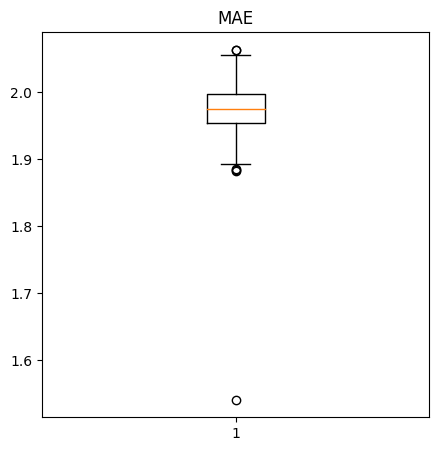

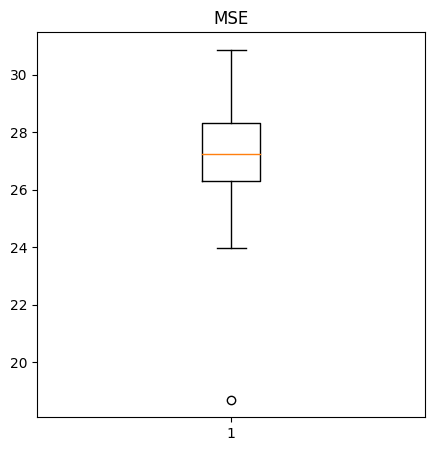

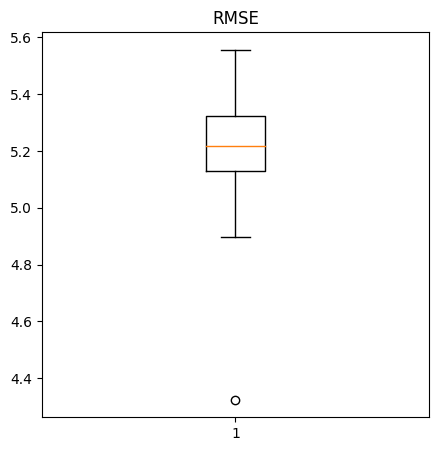

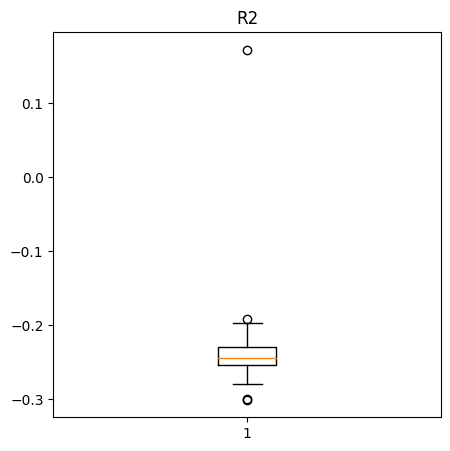

In [290]:
Results1={}
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
lstResults1 = []
variances1 = feature_vector1.var()
selector1 = VarianceThreshold()
X_train_selected1 = X_train1[selected_features1]
X_test_selected1 = X_test1[selected_features1]
model1 = LinearRegression().fit(X_train_selected1, y_train1)
for i in range(100):
  X_train1, X_test1, y_train1, y_test1 = train_test_split(feature_vector1, target_vector1, test_size=0.3, random_state=i)
  selector1.fit(X_train1)

  y_pred1 = model1.predict(X_test_selected1)

  metrics1 = {'MAE': mean_absolute_error(y_test1, y_pred1),
               'MSE': mean_squared_error(y_test1, y_pred1),
               'RMSE': mean_squared_error(y_test1, y_pred1, squared=False),
               'R2': r2_score(y_test1, y_pred1)}
  lstResults1.append(metrics1)

selected_features1 = feature_vector1.columns[selector1.get_support()]
print("Selected Features and Variance:")

for feature in selected_features1:
    print(feature,": ",variances1[feature])
print(metrics1)

df1 = pd.DataFrame(lstResults1)


for column in df1.columns:
    plt.figure(figsize=(5,5))
    plt.boxplot(df1[column], vert=True)
    plt.title(column)
    plt.show()

Results1['LinearRegression']={'MAE': round(df1['MAE'].mean(),3), 'MSE': round(df1['MSE'].mean(),3), 'RMSE': round(df1['RMSE'].mean(),3), 'R2': round(df1['R2'].mean(),3)}

SelectKBest method (HIGH)

{'MAE': 1.6637493332001563, 'MSE': 19.345539336491417, 'RMSE': 4.39835643581684, 'R2': -0.0022877921383452904}


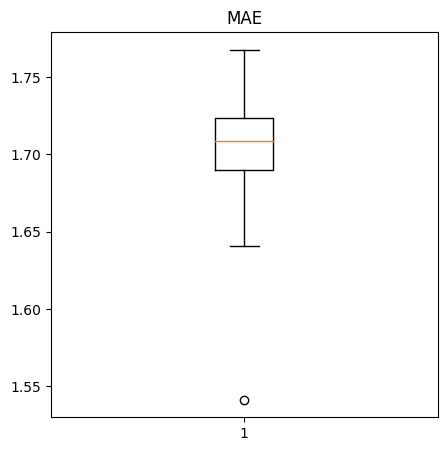

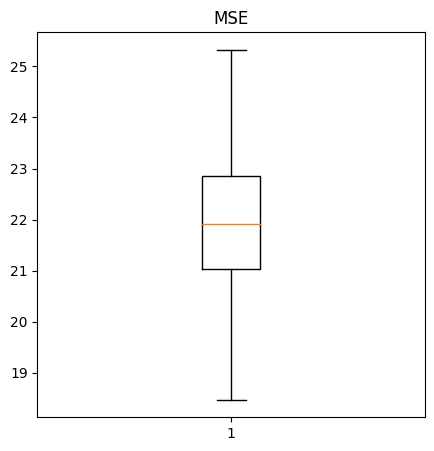

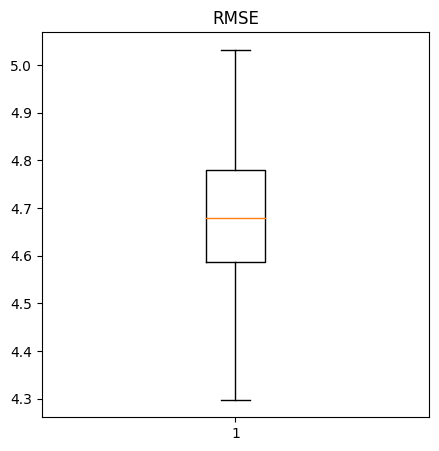

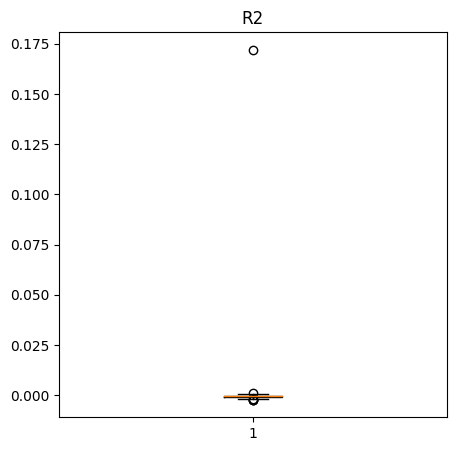

In [291]:
Results2 = {}
from sklearn.feature_selection import SelectKBest, f_regression
selector2 = SelectKBest(f_regression, k=8)
selector2.fit(X_train2, y_train2)
X_train_selected2 = selector2.transform(X_train2)
X_test_selected2 = selector2.transform(X_test2)
model2 = LinearRegression()
lstResults2 = []

for i in range(100):
  X_train2, X_test2, y_train2, y_test2 = train_test_split(feature_vector1, target_vector1, test_size=0.3, random_state=i)

  model2.fit(X_train_selected2, y_train2)
  y_pred2 = model2.predict(X_test_selected2)
  metrics2 = {'MAE': mean_absolute_error(y_test2, y_pred2),
               'MSE': mean_squared_error(y_test2, y_pred2),
               'RMSE': mean_squared_error(y_test2, y_pred2, squared=False),
               'R2': r2_score(y_test2, y_pred2)}
  lstResults2.append(metrics2)
print(metrics2)
df2 = pd.DataFrame(lstResults2)
for column in df2.columns:
    plt.figure(figsize=(5,5))
    plt.boxplot(df2[column], vert=True)
    plt.title(column)
    plt.show()

Results2['LinearRegression']={'MAE': round(df2['MAE'].mean(),3), 'MSE': round(df2['MSE'].mean(),3), 'RMSE': round(df2['RMSE'].mean(),3), 'R2': round(df2['R2'].mean(),3)}


Sequential Feature Selection (HIGH)

Selected features: Index(['MARKET', 'VOLUME', 'TRADE_QTY', 'NO_OF_TRADES', 'BEST_ASK_QTY',
       'BEST_BID_PRICE'],
      dtype='object')
{'MAE': 1.663435919118034, 'MSE': 19.337208095923863, 'RMSE': 4.397409248173732, 'R2': -0.001856152545931522}


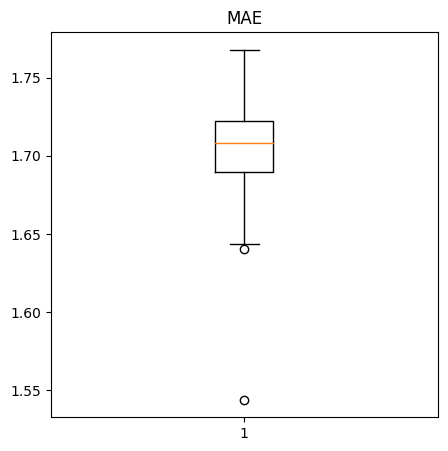

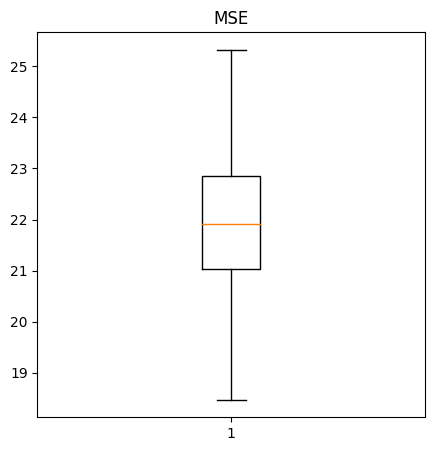

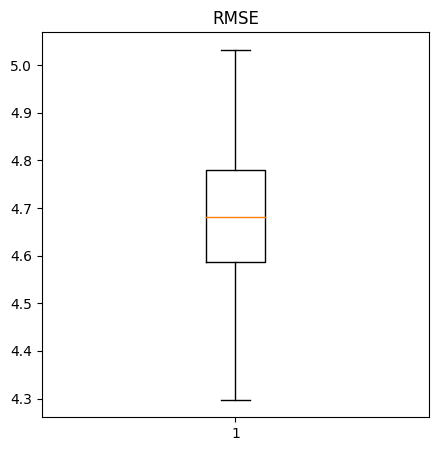

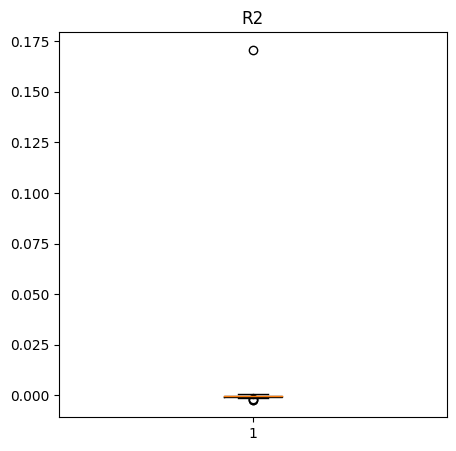

In [292]:
Results3 = {}

from sklearn.feature_selection import SequentialFeatureSelector
lstResults3 = []
sfs3 = SequentialFeatureSelector(model3, n_features_to_select=6, direction='backward')
sfs3.fit(X_train3, y_train3)
X_train_selected3 = sfs3.transform(X_train3)
X_test_selected3 = sfs3.transform(X_test3)
for i in range(100):
  X_train3, X_test3, y_train3, y_test3 = train_test_split(feature_vector1,target_vector1, test_size=0.3, random_state=i)

  model3 = LinearRegression()

  model3.fit(X_train_selected3, y_train3)
  y_pred3 = model3.predict(X_test_selected3)
  metrics3 = {'MAE': mean_absolute_error(y_test3, y_pred3),
               'MSE': mean_squared_error(y_test3, y_pred3),
               'RMSE': mean_squared_error(y_test3, y_pred3, squared=False),
               'R2': r2_score(y_test3, y_pred3)}
  lstResults3.append(metrics3)

selected_features3 = feature_vector1.columns[sfs3.get_support()]
print("Selected features:", selected_features3)
print(metrics3)
df3 = pd.DataFrame(lstResults3)
for column in df3.columns:
    plt.figure(figsize=(5,5))
    plt.boxplot(df3[column], vert=True)
    plt.title(column)
    plt.show()

Results3['LinearRegression']={'MAE': round(df3['MAE'].mean(),3), 'MSE': round(df3['MSE'].mean(),3), 'RMSE': round(df3['RMSE'].mean(),3), 'R2': round(df3['R2'].mean(),3)}

Removing features with low variance method (LOW)

Selected Features and Variance:
MARKET :  0.5632200101637923
VOLUME :  91358547240.11235
TRADE_QTY :  21076797708.364723
NO_OF_TRADES :  4386.546281686843
BEST_ASK_PRICE :  2.312222768151919
BEST_ASK_QTY :  4546424799.745177
BEST_BID_PRICE :  2.252571193242034
BEST_BID_QTY :  10164342907.438026
{'MAE': 1.8713315272084794, 'MSE': 23.54993242641246, 'RMSE': 4.852827261134736, 'R2': -0.26244349691374946}


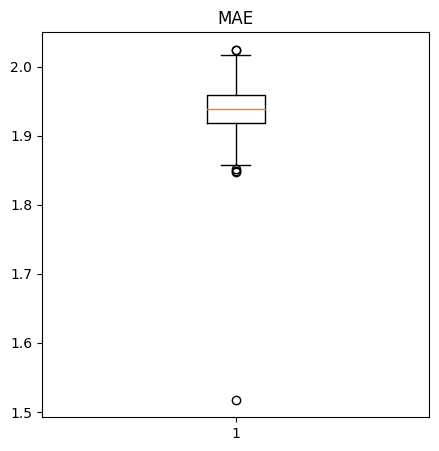

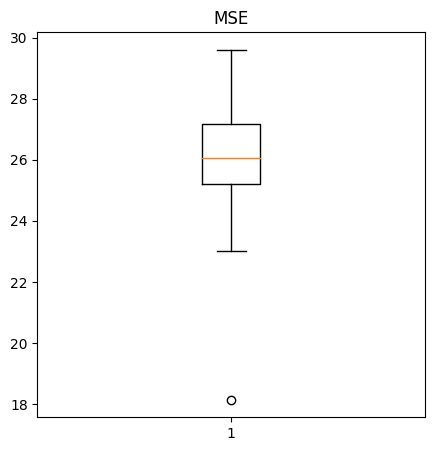

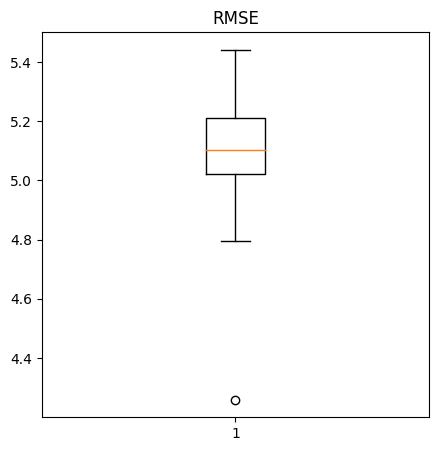

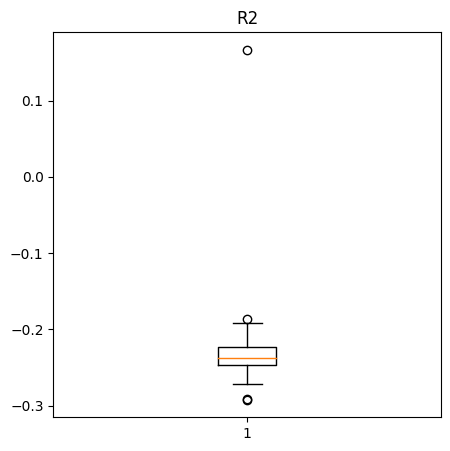

In [293]:
Results4 = {}
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
lstResults4 = []
variances4 = feature_vector2.var()
selector4 = VarianceThreshold()
X_train_selected4 = X_train4[selected_features4]
X_test_selected4 = X_test4[selected_features4]
model4 = LinearRegression().fit(X_train_selected4, y_train4)
for i in range(100):
  X_train4, X_test4, y_train4, y_test4 = train_test_split(feature_vector2, target_vector2, test_size=0.3, random_state=i)
  selector4.fit(X_train4)

  y_pred4 = model4.predict(X_test_selected4)

  metrics4 = {'MAE': mean_absolute_error(y_test4, y_pred4),
               'MSE': mean_squared_error(y_test4, y_pred4),
               'RMSE': mean_squared_error(y_test4, y_pred4, squared=False),
               'R2': r2_score(y_test4, y_pred4)}
  lstResults4.append(metrics4)

selected_features4 = feature_vector2.columns[selector4.get_support()]
print("Selected Features and Variance:")

for feature in selected_features4:
    print(feature,": ",variances4[feature])
print(metrics4)

df4 = pd.DataFrame(lstResults4)

for column in df4.columns:
    plt.figure(figsize=(5,5))
    plt.boxplot(df4[column], vert=True)
    plt.title(column)
    plt.show()

Results4['LinearRegression']={'MAE': round(df4['MAE'].mean(),3), 'MSE': round(df4['MSE'].mean(),3), 'RMSE': round(df4['RMSE'].mean(),3), 'R2': round(df4['R2'].mean(),3)}

SelectKBest method (LOW)

{'MAE': 1.63570234372191, 'MSE': 18.695924715427637, 'RMSE': 4.323878434395171, 'R2': -0.0022342378065249857}


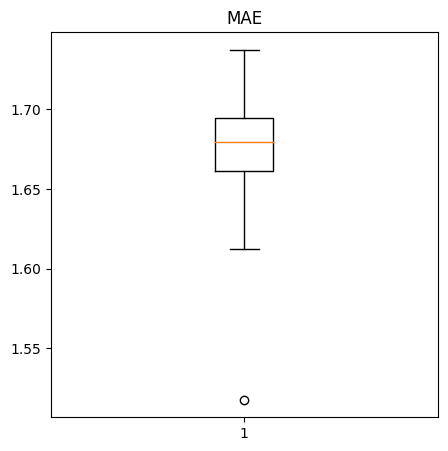

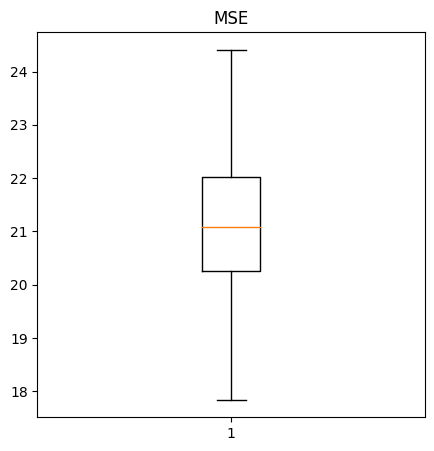

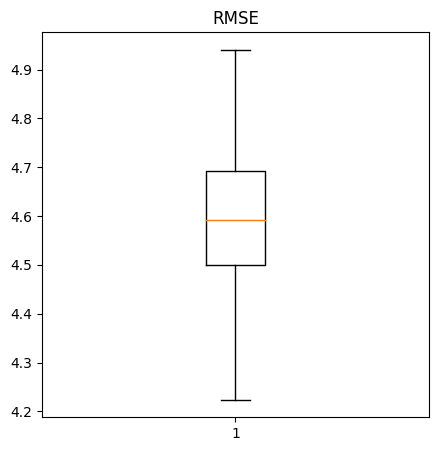

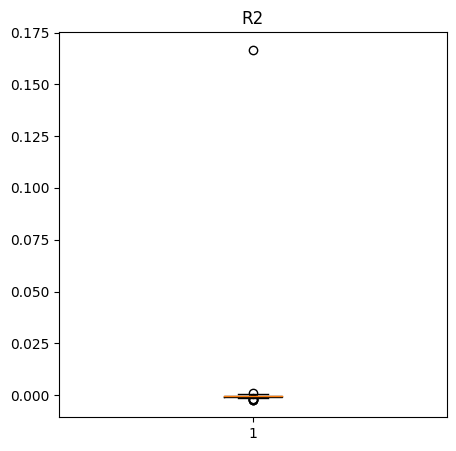

In [294]:
Results5 = {}
from sklearn.feature_selection import SelectKBest, f_regression
selector5 = SelectKBest(f_regression, k=8)
selector5.fit(X_train5, y_train5)
X_train_selected5 = selector5.transform(X_train5)
X_test_selected5 = selector5.transform(X_test5)
model5 = LinearRegression()
lstResults5 = []

for i in range(100):
  X_train5, X_test5, y_train5, y_test5 = train_test_split(feature_vector2, target_vector2, test_size=0.3, random_state=i)

  model5.fit(X_train_selected5, y_train5)
  y_pred5 = model5.predict(X_test_selected5)
  metrics5 = {'MAE': mean_absolute_error(y_test5, y_pred5),
               'MSE': mean_squared_error(y_test5, y_pred5),
               'RMSE': mean_squared_error(y_test5, y_pred5, squared=False),
               'R2': r2_score(y_test5, y_pred5)}
  lstResults5.append(metrics5)
print(metrics5)
df5 = pd.DataFrame(lstResults5)
for column in df5.columns:
    plt.figure(figsize=(5,5))
    plt.boxplot(df5[column], vert=True)
    plt.title(column)
    plt.show()

Results5['LinearRegression']={'MAE': round(df5['MAE'].mean(),3), 'MSE': round(df5['MSE'].mean(),3), 'RMSE': round(df5['RMSE'].mean(),3), 'R2': round(df5['R2'].mean(),3)}

Sequential Feature Selection (LOW)

Selected features: Index(['MARKET', 'VOLUME', 'TRADE_QTY', 'NO_OF_TRADES', 'BEST_ASK_QTY',
       'BEST_BID_PRICE'],
      dtype='object')
{'MAE': 1.6353891726128977, 'MSE': 18.687821559700193, 'RMSE': 4.32294130884288, 'R2': -0.0017998511566033049}


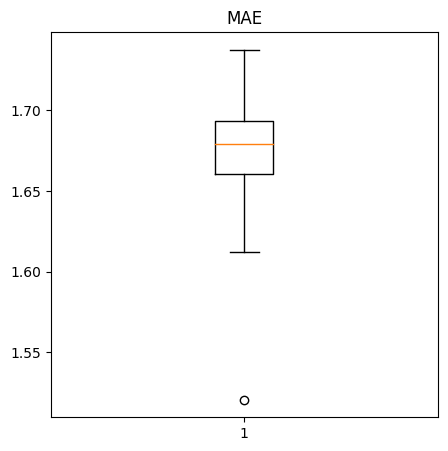

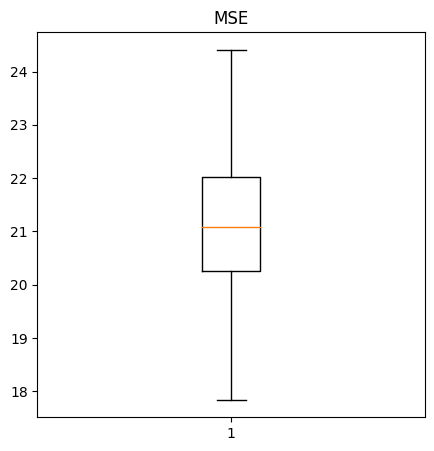

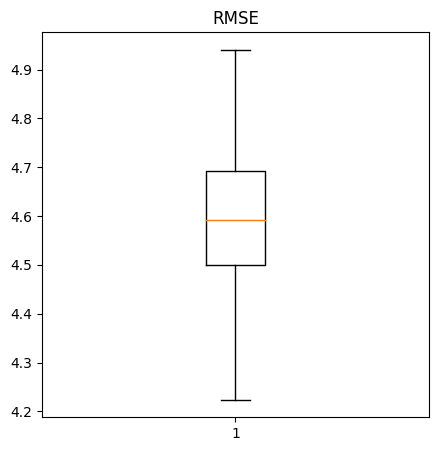

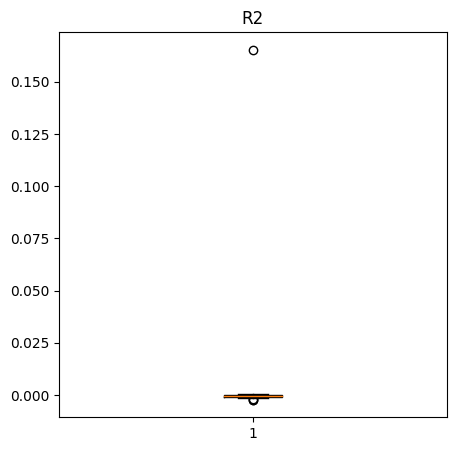

In [295]:
Results6 = {}
from sklearn.feature_selection import SequentialFeatureSelector
lstResults6 = []
sfs6 = SequentialFeatureSelector(model6, n_features_to_select=6, direction='backward')
sfs6.fit(X_train6, y_train6)
X_train_selected6 = sfs6.transform(X_train6)
X_test_selected6 = sfs6.transform(X_test6)
for i in range(100):
  X_train6, X_test6, y_train6, y_test6 = train_test_split(feature_vector2,target_vector2, test_size=0.3, random_state=i)

  model6 = LinearRegression()

  model6.fit(X_train_selected6, y_train6)
  y_pred6 = model6.predict(X_test_selected6)
  metrics6 = {'MAE': mean_absolute_error(y_test6, y_pred6),
               'MSE': mean_squared_error(y_test6, y_pred6),
               'RMSE': mean_squared_error(y_test6, y_pred6, squared=False),
               'R2': r2_score(y_test6, y_pred6)}
  lstResults6.append(metrics6)

selected_features6 = feature_vector2.columns[sfs6.get_support()]
print("Selected features:", selected_features6)
print(metrics6)
df6 = pd.DataFrame(lstResults6)
for column in df6.columns:
    plt.figure(figsize=(5,5))
    plt.boxplot(df6[column], vert=True)
    plt.title(column)
    plt.show()

Results6['LinearRegression']={'MAE': round(df6['MAE'].mean(),3), 'MSE': round(df6['MSE'].mean(),3), 'RMSE': round(df6['RMSE'].mean(),3), 'R2': round(df6['R2'].mean(),3)}

### KNNR

Removing features with low variance method (HIGH)

{'MAE': 0.27874980168173885, 'MSE': 1.7688899016341424, 'RMSE': 1.3299962036164399, 'R2': 0.9083542348855369}


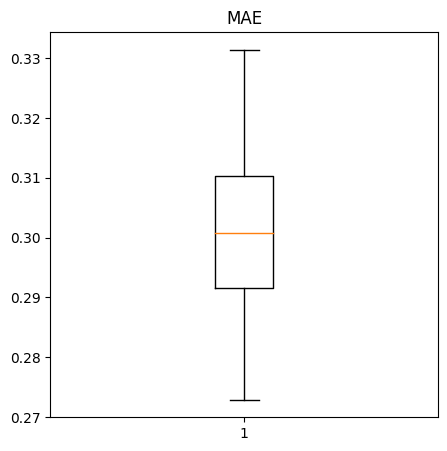

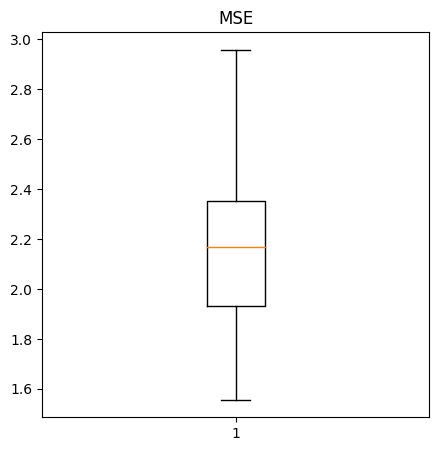

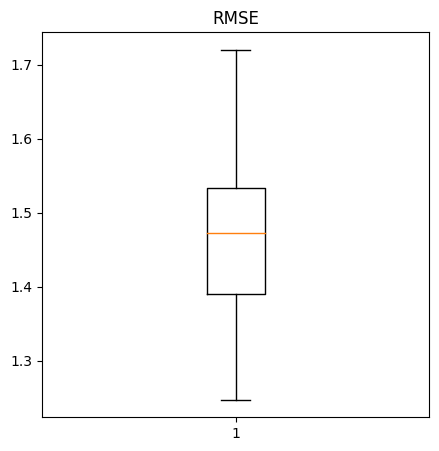

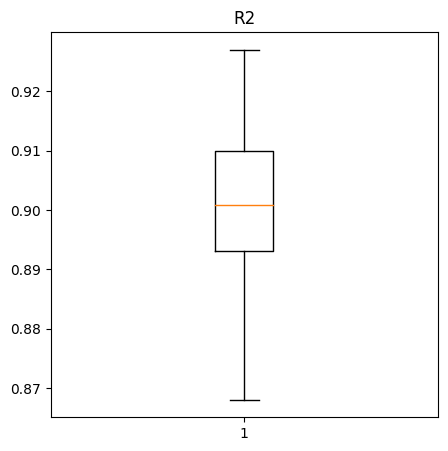

In [296]:
from sklearn.neighbors import KNeighborsRegressor
lstResults1 = []


for i in range(100):
    X_train1, X_test1, y_train1, y_test1 = train_test_split(feature_vector1, target_vector1, test_size=0.3, random_state=i)

    selector1 = SelectKBest(f_regression, k=8)
    selector1.fit(X_train1, y_train1)

    X_train_selected1 = selector1.transform(X_train1)
    X_test_selected1 = selector1.transform(X_test1)

    model1 = KNeighborsRegressor(n_neighbors=3)
    model1.fit(X_train_selected1, y_train1)
    y_pred1 = model1.predict(X_test_selected1)

    metrics1 = {
        'MAE': mean_absolute_error(y_test1, y_pred1),
        'MSE': mean_squared_error(y_test1, y_pred1),
        'RMSE': mean_squared_error(y_test1, y_pred1, squared=False),
        'R2': r2_score(y_test1, y_pred1)
    }
    lstResults1.append(metrics1)

df1 = pd.DataFrame(lstResults1)
print(metrics1)

for column in df1.columns:
    plt.figure(figsize=(5, 5))
    plt.boxplot(df1[column], vert=True)
    plt.title(column)
    plt.show()

Results1['KNeighborsRegressor'] = {'MAE': round(df1['MAE'].mean(), 3),'MSE': round(df1['MSE'].mean(), 3),'RMSE': round(df1['RMSE'].mean(), 3),'R2': round(df1['R2'].mean(), 3)}

SelectKBest method (HIGH)

{'MAE': 0.30959230723465014, 'MSE': 1.9665712114394929, 'RMSE': 1.4023448974626367, 'R2': 0.8981124132384101}


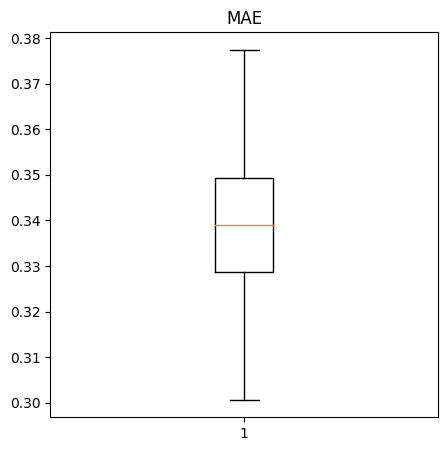

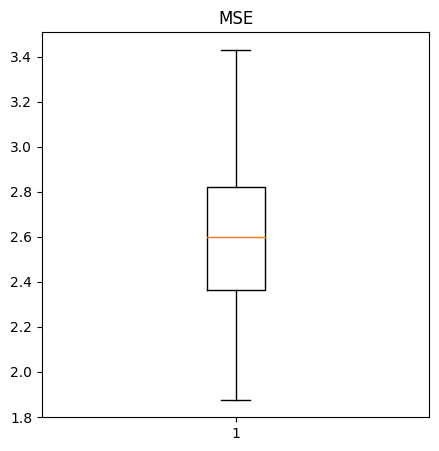

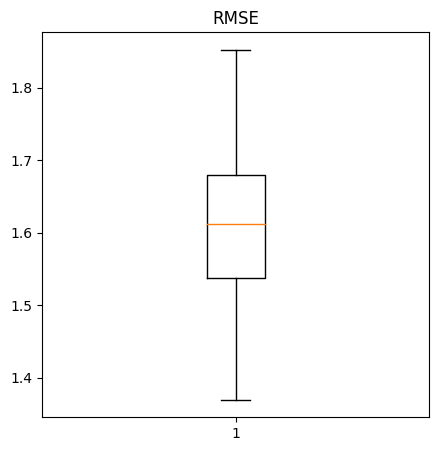

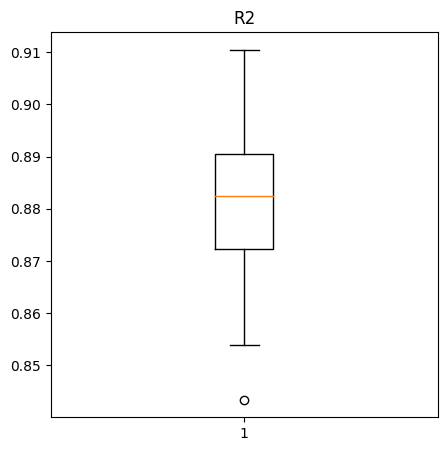

In [297]:
from sklearn.neighbors import KNeighborsRegressor
selector2 = SelectKBest(f_regression, k=8)
selector2.fit(X_train2, y_train2)

lstResults2 = []

for i in range(100):
    X_train2, X_test2, y_train2, y_test2 = train_test_split(feature_vector1, target_vector1, test_size=0.3, random_state=i)

    X_train_selected2 = selector2.transform(X_train2)
    X_test_selected2 = selector2.transform(X_test2)

    model2 = KNeighborsRegressor(n_neighbors=8).fit(X_train_selected2, y_train2)
    y_pred2 = model2.predict(X_test_selected2)

    metrics2 = {
        'MAE': mean_absolute_error(y_test2, y_pred2),
        'MSE': mean_squared_error(y_test2, y_pred2),
        'RMSE': mean_squared_error(y_test2, y_pred2, squared=False),
        'R2': r2_score(y_test2, y_pred2)
    }
    lstResults2.append(metrics2)

df2 = pd.DataFrame(lstResults2)
print(metrics2)

for column in df2.columns:
    plt.figure(figsize=(5, 5))
    plt.boxplot(df2[column], vert=True)
    plt.title(column)
    plt.show()

Results2['KNeighborsRegressor'] = {'MAE': round(df2['MAE'].mean(), 3),'MSE': round(df2['MSE'].mean(), 3),'RMSE': round(df2['RMSE'].mean(), 3),'R2': round(df2['R2'].mean(), 3)}

Sequential Feature Selection (HIGH)

{'MAE': 0.22012494050452164, 'MSE': 1.543163468454175, 'RMSE': 1.2422413084639292, 'R2': 0.9200490677048242}


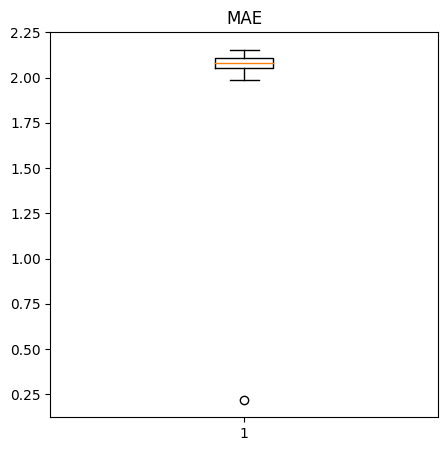

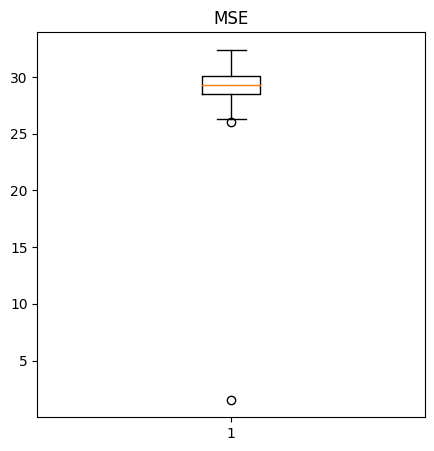

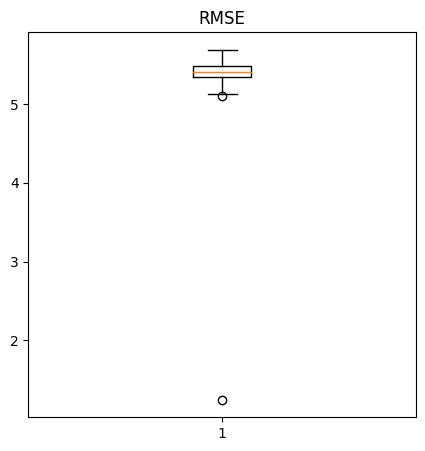

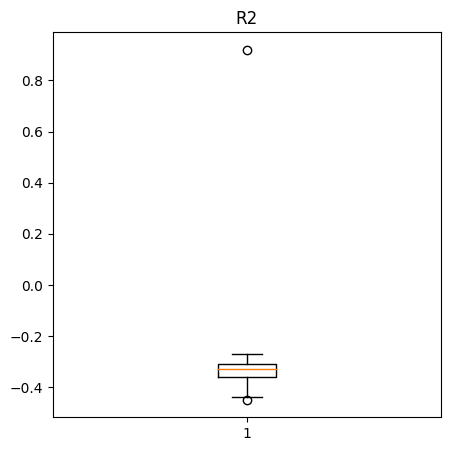

In [298]:
from sklearn.feature_selection import SequentialFeatureSelector
lstResults3 = []
sfs3 = SequentialFeatureSelector(model3, n_features_to_select=6, direction='backward')
sfs3.fit(X_train3, y_train3)
X_train_selected3 = sfs3.transform(X_train3)
X_test_selected3 = sfs3.transform(X_test3)
for i in range(100):
  X_train3, X_test3, y_train3, y_test3 = train_test_split(feature_vector1,target_vector1, test_size=0.3, random_state=i)

  model3 =KNeighborsRegressor(n_neighbors=3).fit(X_train3, y_train3)

  model3.fit(X_train_selected3, y_train3)
  y_pred3 = model3.predict(X_test_selected3)
  metrics3 = {'MAE': mean_absolute_error(y_test3, y_pred3),
               'MSE': mean_squared_error(y_test3, y_pred3),
               'RMSE': mean_squared_error(y_test3, y_pred3, squared=False),
               'R2': r2_score(y_test3, y_pred3)}
  lstResults3.append(metrics3)

print(metrics3)
df3 = pd.DataFrame(lstResults3)
for column in df3.columns:
    plt.figure(figsize=(5,5))
    plt.boxplot(df3[column], vert=True)
    plt.title(column)
    plt.show()

Results3['KNeighborsRegressor']={'MAE': round(df3['MAE'].mean(),3), 'MSE': round(df3['MSE'].mean(),3), 'RMSE': round(df3['RMSE'].mean(),3), 'R2': round(df3['R2'].mean(),3)}

Removing features with low variance method (LOW)

Selected Features and Variance:
MARKET :  0.5632200101637923
VOLUME :  91358547240.11235
TRADE_QTY :  21076797708.364723
NO_OF_TRADES :  4386.546281686843
BEST_ASK_PRICE :  2.312222768151919
BEST_ASK_QTY :  4546424799.745177
BEST_BID_PRICE :  2.252571193242034
BEST_BID_QTY :  10164342907.438026


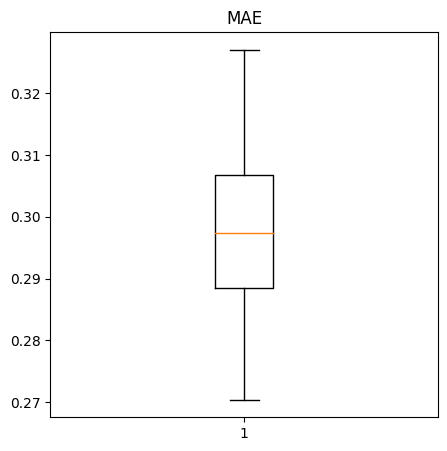

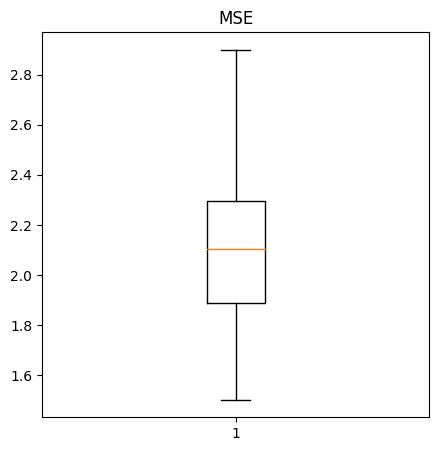

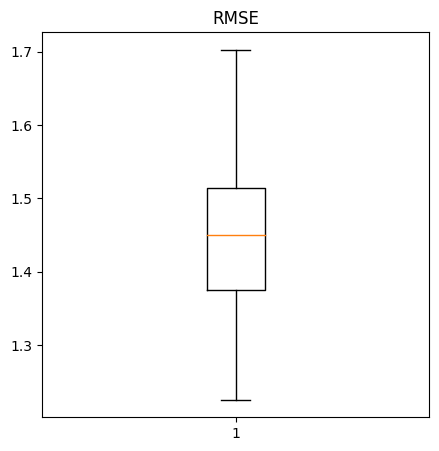

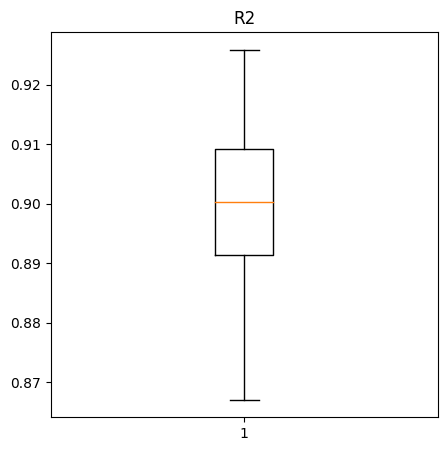

In [299]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
lstResults4 = []
variances4 = feature_vector2.var()

selector4 = VarianceThreshold()
X_train_selected4 = selector4.fit_transform(X_train4)
X_test_selected4 = selector4.transform(X_test4)

selected_features4 = feature_vector2.columns[selector4.get_support()]
print("Selected Features and Variance:")
for feature in selected_features4:
    print(feature, ": ", variances4[feature])

for i in range(100):
    X_train4, X_test4, y_train4, y_test4 = train_test_split(feature_vector2, target_vector2, test_size=0.3, random_state=i)

    selector4.fit(X_train4)
    X_train_selected4 = selector4.transform(X_train4)
    X_test_selected4 = selector4.transform(X_test4)

    model4 = KNeighborsRegressor(n_neighbors=3).fit(X_train_selected4, y_train4)
    y_pred4 = model4.predict(X_test_selected4)

    metrics4 = {'MAE': mean_absolute_error(y_test4, y_pred4),
                  'MSE': mean_squared_error(y_test4, y_pred4),
                  'RMSE': mean_squared_error(y_test4, y_pred4, squared=False),
                  'R2': r2_score(y_test4, y_pred4)}
    lstResults4.append(metrics4)

df4 = pd.DataFrame(lstResults4)

for column in df4.columns:
    plt.figure(figsize=(5, 5))
    plt.boxplot(df4[column], vert=True)
    plt.title(column)
    plt.show()

Results4['KNeighborsRegressor'] = {'MAE': round(df4['MAE'].mean(), 3), 'MSE': round(df4['MSE'].mean(), 3), 'RMSE': round(df4['RMSE'].mean(), 3),'R2': round(df4['R2'].mean(), 3)}

SelectKBest method (LOW)

{'MAE': 0.2762577344121847, 'MSE': 1.7269321632555927, 'RMSE': 1.314127909777276, 'R2': 0.907424181112806}


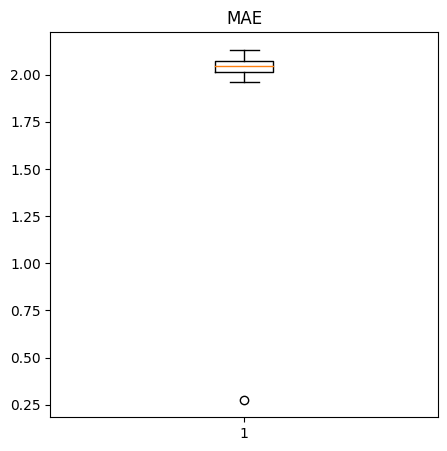

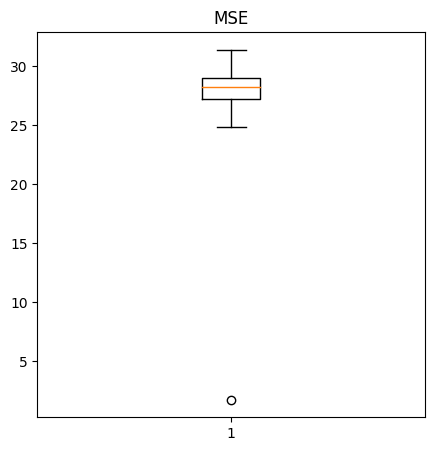

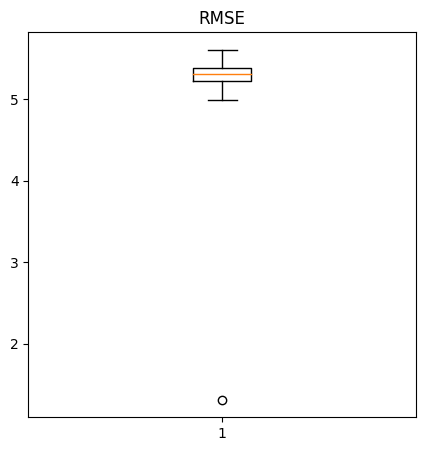

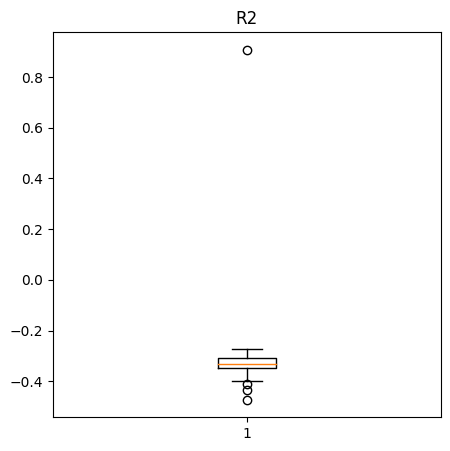

In [300]:
from sklearn.feature_selection import SelectKBest, f_regression
selector5 = SelectKBest(f_regression, k=8)
selector5.fit(X_train5, y_train5)
X_train_selected5 = selector5.transform(X_train5)
X_test_selected5 = selector5.transform(X_test5)
lstResults5 = []

for i in range(100):
  X_train5, X_test5, y_train5, y_test5 = train_test_split(feature_vector2, target_vector2, test_size=0.3, random_state=i)
  model5 =KNeighborsRegressor(n_neighbors=3).fit(X_train5, y_train5)
  model5.fit(X_train_selected5, y_train5)
  y_pred5 = model5.predict(X_test_selected5)
  metrics5 = {'MAE': mean_absolute_error(y_test5, y_pred5),
               'MSE': mean_squared_error(y_test5, y_pred5),
               'RMSE': mean_squared_error(y_test5, y_pred5, squared=False),
               'R2': r2_score(y_test5, y_pred5)}
  lstResults5.append(metrics5)
print(metrics5)
df5 = pd.DataFrame(lstResults5)
for column in df5.columns:
    plt.figure(figsize=(5,5))
    plt.boxplot(df5[column], vert=True)
    plt.title(column)
    plt.show()

Results5['KNeighborsRegressor']={'MAE': round(df5['MAE'].mean(),3), 'MSE': round(df5['MSE'].mean(),3), 'RMSE': round(df5['RMSE'].mean(),3), 'R2': round(df5['R2'].mean(),3)}

Sequential Feature Selection (LOW)

Selected features: Index(['MARKET', 'VOLUME', 'TRADE_QTY', 'NO_OF_TRADES', 'BEST_ASK_QTY',
       'BEST_BID_PRICE'],
      dtype='object')
{'MAE': 0.21708234174202762, 'MSE': 1.5033185176371042, 'RMSE': 1.2260989020617807, 'R2': 0.9194114593614529}


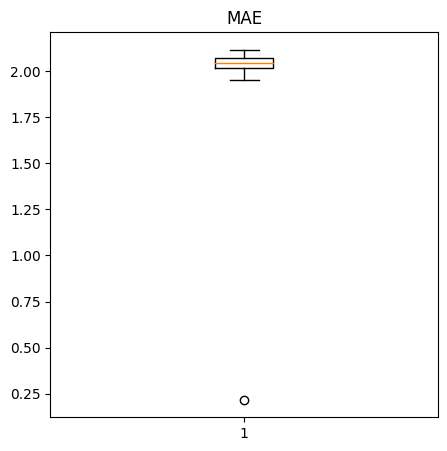

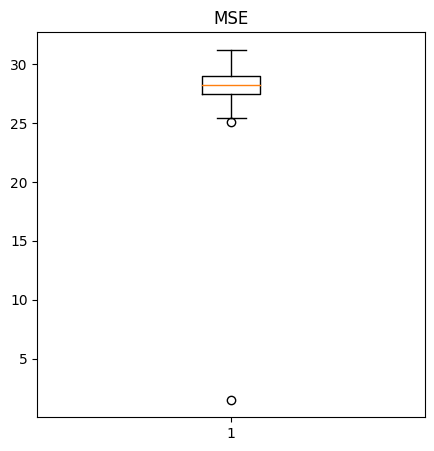

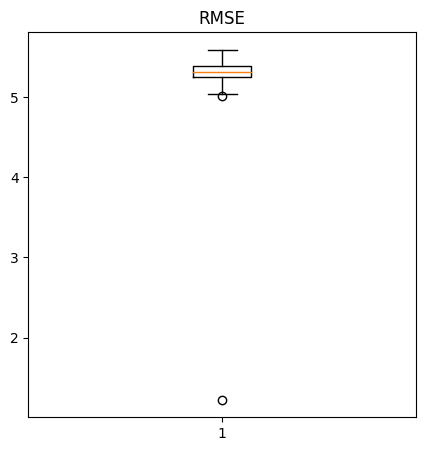

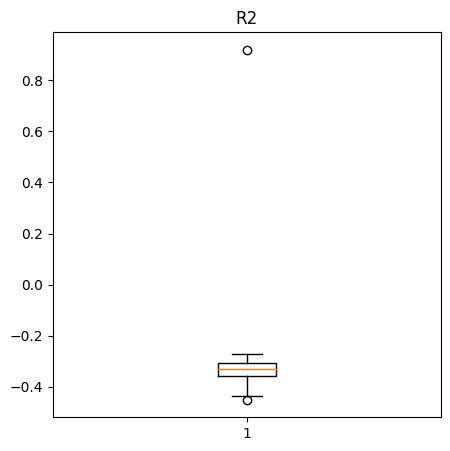

In [301]:
from sklearn.feature_selection import SequentialFeatureSelector
lstResults6 = []
sfs6 = SequentialFeatureSelector(model6, n_features_to_select=6, direction='backward')
sfs6.fit(X_train6, y_train6)
X_train_selected6 = sfs6.transform(X_train6)
X_test_selected6 = sfs6.transform(X_test6)
for i in range(100):
  X_train6, X_test6, y_train6, y_test6 = train_test_split(feature_vector2,target_vector2, test_size=0.3, random_state=i)

  model6 =KNeighborsRegressor(n_neighbors=3).fit(X_train6, y_train6)

  model6.fit(X_train_selected6, y_train6)
  y_pred6 = model6.predict(X_test_selected6)
  metrics6 = {'MAE': mean_absolute_error(y_test6, y_pred6),
               'MSE': mean_squared_error(y_test6, y_pred6),
               'RMSE': mean_squared_error(y_test6, y_pred6, squared=False),
               'R2': r2_score(y_test6, y_pred6)}
  lstResults6.append(metrics6)

selected_features6 = feature_vector2.columns[sfs6.get_support()]
print("Selected features:", selected_features6)
print(metrics6)
df6 = pd.DataFrame(lstResults6)
for column in df6.columns:
    plt.figure(figsize=(5,5))
    plt.boxplot(df6[column], vert=True)
    plt.title(column)
    plt.show()

Results6['KNeighborsRegressor']={'MAE': round(df6['MAE'].mean(),3), 'MSE': round(df6['MSE'].mean(),3), 'RMSE': round(df6['RMSE'].mean(),3), 'R2': round(df6['R2'].mean(),3)}

### Decision Tree

Removing features with low variance method (HIGH)

{'MAE': 0.3491706330318896, 'MSE': 2.6961997977153738, 'RMSE': 1.642010900607963, 'R2': 0.8603105297085966}


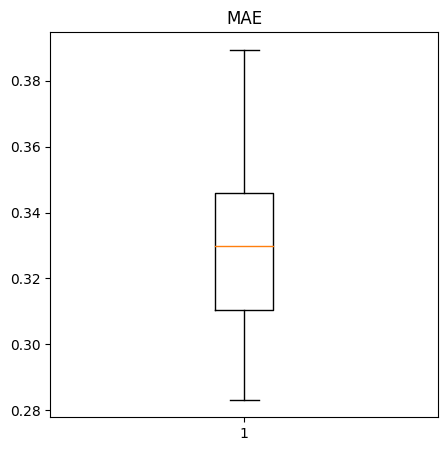

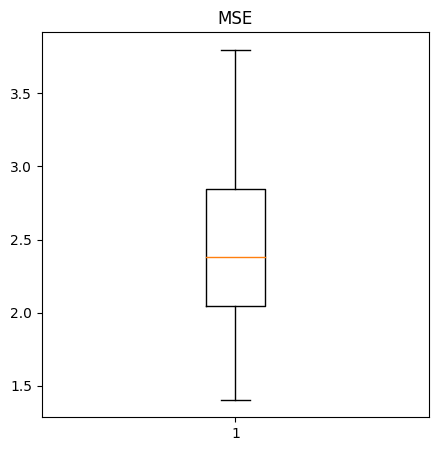

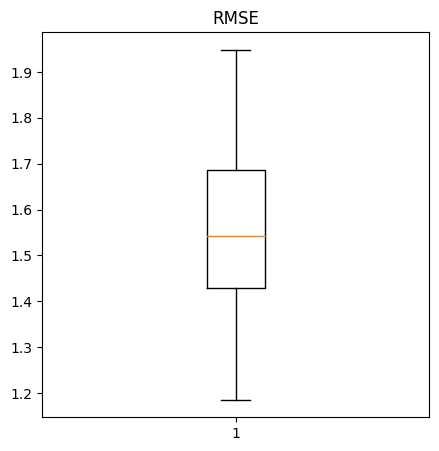

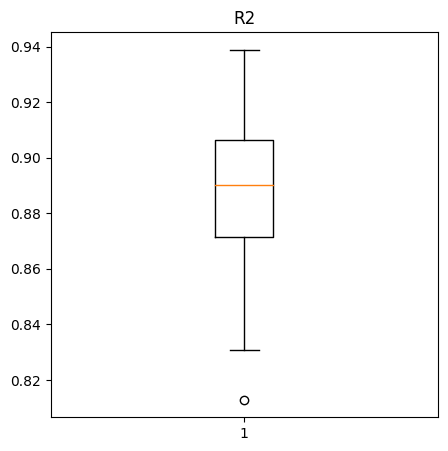

In [302]:
from sklearn.tree import DecisionTreeRegressor

# initialize a list to store the results
lstResults1 = []

variances1 = feature_vector1.var()
selector1 = VarianceThreshold()
X_train_selected1 = X_train1[selected_features1]
X_test_selected1 = X_test1[selected_features1]

for i in range(100):
    # split the data into training and testing sets
    X_train1, X_test1, y_train1, y_test1 = train_test_split(feature_vector1, target_vector1, test_size=0.3, random_state=i)

    # train a linear regression model on the selected features
    model1 = DecisionTreeRegressor().fit(X_train1, y_train1)
    # make predictions on the testing set
    y_pred1 = model1.predict(X_test1)

   # calculate regression metrics and append to the results list
    metrics1 = {'MAE': mean_absolute_error(y_test1, y_pred1),
               'MSE': mean_squared_error(y_test1, y_pred1),
               'RMSE': mean_squared_error(y_test1, y_pred1, squared=False),
               'R2': r2_score(y_test1, y_pred1)}
    lstResults1.append(metrics1)

print(metrics1)
# Convert the results to a DataFrame
df1 = pd.DataFrame(lstResults1)

# Plot a boxplot for each metric

for column in df1.columns:
    plt.figure(figsize=(5,5))
    plt.boxplot(df1[column], vert=True)
    plt.title(column)
    plt.show()
Results1['DecisionTreeRegressor']={'MAE': round(df1['MAE'].mean(),3), 'MSE': round(df1['MSE'].mean(),3), 'RMSE': round(df1['RMSE'].mean(),3), 'R2': round(df1['R2'].mean(),3)}

SelectKBest method (HIGH)

{'MAE': 0.3331485007139457, 'MSE': 2.2621123274631127, 'RMSE': 1.50403202341676, 'R2': 0.8828004983047869}


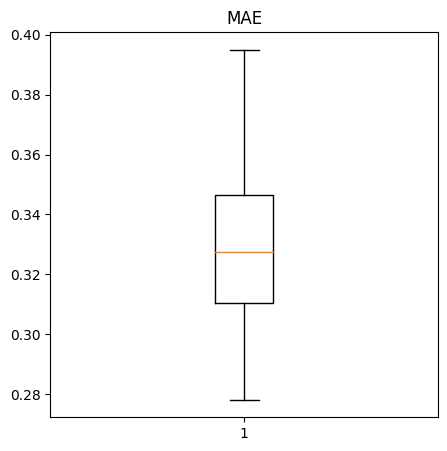

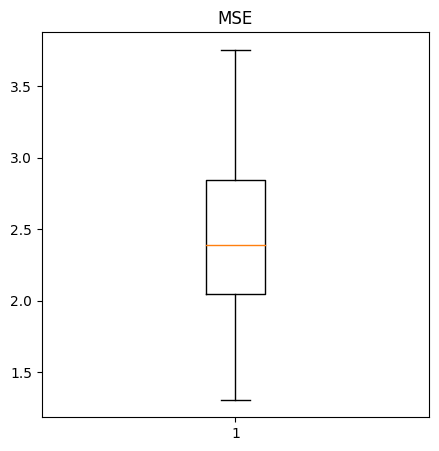

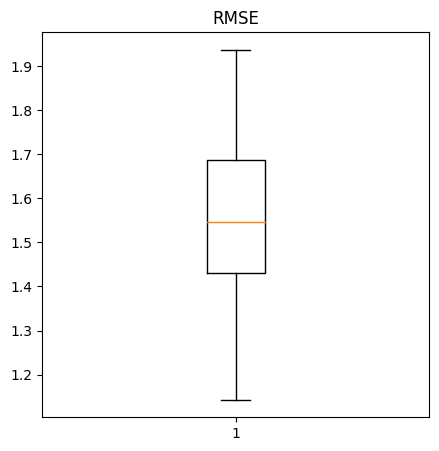

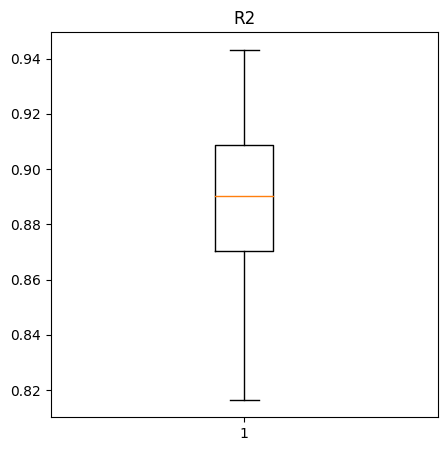

In [303]:
from sklearn.tree import DecisionTreeRegressor

# initialize a list to store the results
lstResults2 = []

selector2 = SelectKBest(f_regression, k=8)
selector2.fit(X_train2, y_train2)
X_train_selected2 = selector2.transform(X_train2)
X_test_selected2 = selector2.transform(X_test2)
model2 = LinearRegression()

for i in range(100):
    # split the data into training and testing sets
    X_train2, X_test2, y_train2, y_test2 = train_test_split(feature_vector1, target_vector1, test_size=0.3, random_state=i)

    # train a linear regression model on the selected features
    model2 = DecisionTreeRegressor().fit(X_train2, y_train2)
    # make predictions on the testing set
    y_pred2 = model2.predict(X_test2)

   # calculate regression metrics and append to the results list
    metrics2 = {'MAE': mean_absolute_error(y_test2, y_pred2),
               'MSE': mean_squared_error(y_test2, y_pred2),
               'RMSE': mean_squared_error(y_test2, y_pred2, squared=False),
               'R2': r2_score(y_test2, y_pred2)}
    lstResults2.append(metrics2)

print(metrics2)
# Convert the results to a DataFrame
df2 = pd.DataFrame(lstResults2)

# Plot a boxplot for each metric

for column in df2.columns:
    plt.figure(figsize=(5,5))
    plt.boxplot(df2[column], vert=True)
    plt.title(column)
    plt.show()
Results2['DecisionTreeRegressor']={'MAE': round(df2['MAE'].mean(),3), 'MSE': round(df2['MSE'].mean(),3), 'RMSE': round(df2['RMSE'].mean(),3), 'R2': round(df2['R2'].mean(),3)}

Sequential Feature Selection (HIGH)

{'MAE': 0.34980723465016655, 'MSE': 2.636142146596859, 'RMSE': 1.623620074585449, 'R2': 0.8634221023297354}


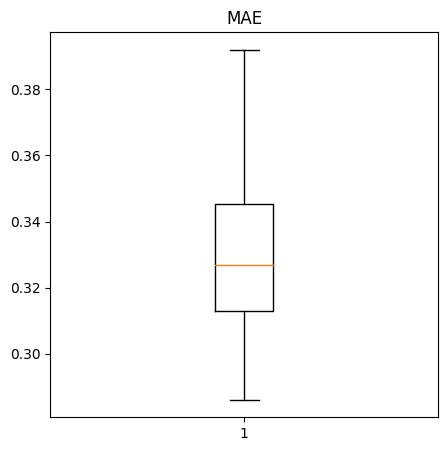

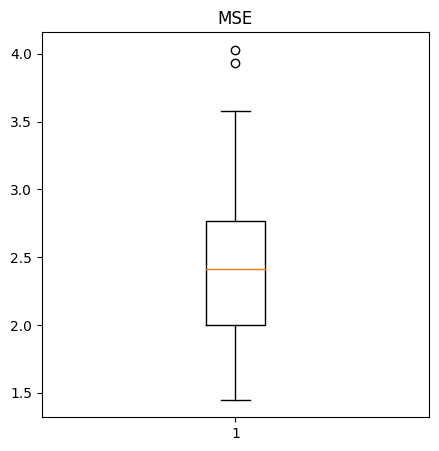

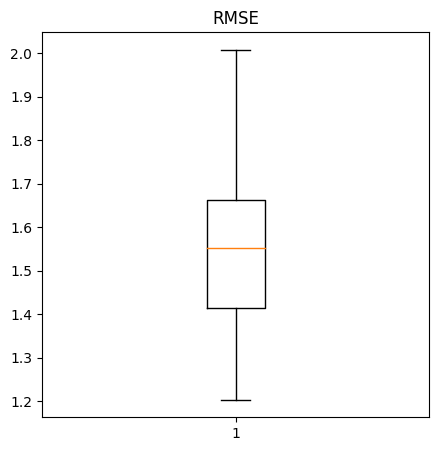

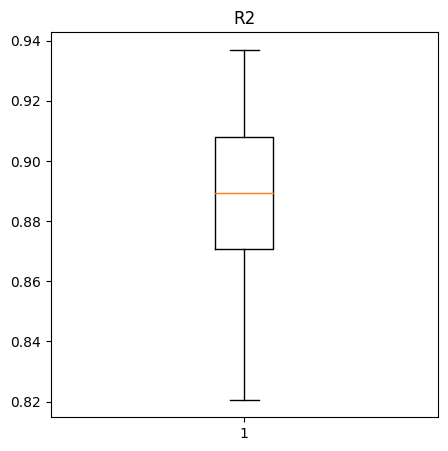

In [304]:
from sklearn.tree import DecisionTreeRegressor

# initialize a list to store the results
lstResults3 = []

sfs3 = SequentialFeatureSelector(model3, n_features_to_select=6, direction='backward')
sfs3.fit(X_train3, y_train3)
X_train_selected3 = sfs3.transform(X_train3)
X_test_selected3 = sfs3.transform(X_test3)

for i in range(100):
    # split the data into training and testing sets
    X_train3, X_test3, y_train3, y_test3 = train_test_split(feature_vector1, target_vector1, test_size=0.3, random_state=i)

    # train a linear regression model on the selected features
    model3 = DecisionTreeRegressor().fit(X_train3, y_train3)
    # make predictions on the testing set
    y_pred3 = model3.predict(X_test3)

   # calculate regression metrics and append to the results list
    metrics3 = {'MAE': mean_absolute_error(y_test3, y_pred3),
               'MSE': mean_squared_error(y_test3, y_pred3),
               'RMSE': mean_squared_error(y_test3, y_pred3, squared=False),
               'R2': r2_score(y_test3, y_pred3)}
    lstResults3.append(metrics3)

print(metrics3)
# Convert the results to a DataFrame
df3 = pd.DataFrame(lstResults3)

# Plot a boxplot for each metric

for column in df3.columns:
    plt.figure(figsize=(5,5))
    plt.boxplot(df3[column], vert=True)
    plt.title(column)
    plt.show()
Results3['DecisionTreeRegressor']={'MAE': round(df3['MAE'].mean(),3), 'MSE': round(df3['MSE'].mean(),3), 'RMSE': round(df3['RMSE'].mean(),3), 'R2': round(df3['R2'].mean(),3)}

Removing features with low variance method (LOW)

{'MAE': 0.32268919562113285, 'MSE': 2.4032939552594, 'RMSE': 1.5502560934437253, 'R2': 0.8711663893529248}


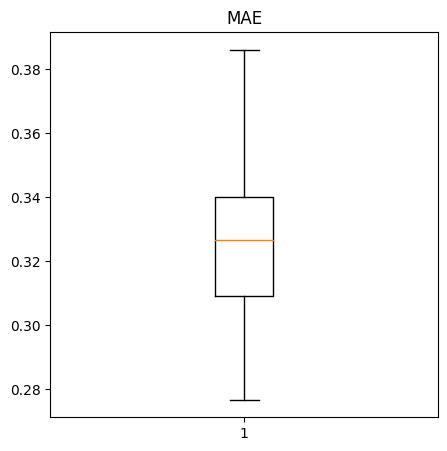

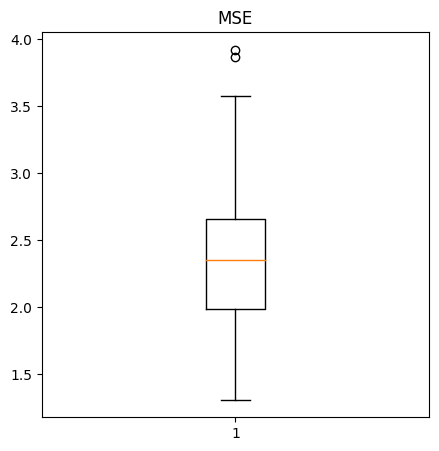

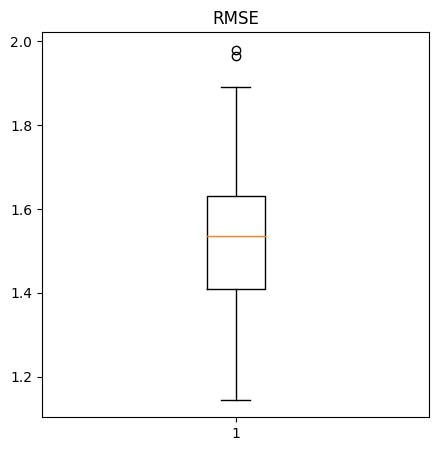

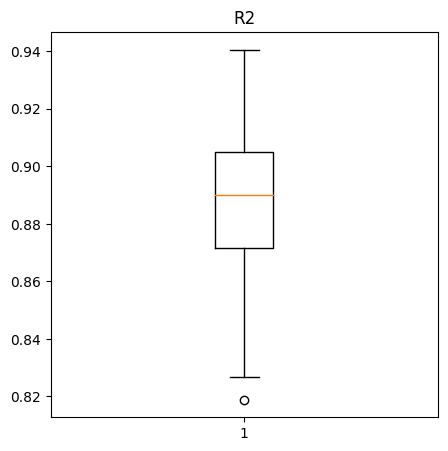

In [305]:
from sklearn.tree import DecisionTreeRegressor

# initialize a list to store the results
lstResults4 = []

variances4 = feature_vector2.var()
selector4 = VarianceThreshold()
X_train_selected4 = X_train4[selected_features4]
X_test_selected4 = X_test4[selected_features4]

for i in range(100):
    # split the data into training and testing sets
    X_train4, X_test4, y_train4, y_test4 = train_test_split(feature_vector2, target_vector2, test_size=0.3, random_state=i)

    # train a linear regression model on the selected features
    model4 = DecisionTreeRegressor().fit(X_train4, y_train4)
    # make predictions on the testing set
    y_pred4 = model4.predict(X_test4)

   # calculate regression metrics and append to the results list
    metrics4 = {'MAE': mean_absolute_error(y_test4, y_pred4),
               'MSE': mean_squared_error(y_test4, y_pred4),
               'RMSE': mean_squared_error(y_test4, y_pred4, squared=False),
               'R2': r2_score(y_test4, y_pred4)}
    lstResults4.append(metrics4)

print(metrics4)
# Convert the results to a DataFrame
df4 = pd.DataFrame(lstResults4)

# Plot a boxplot for each metric

for column in df4.columns:
    plt.figure(figsize=(5,5))
    plt.boxplot(df4[column], vert=True)
    plt.title(column)
    plt.show()
Results4['DecisionTreeRegressor']={'MAE': round(df4['MAE'].mean(),3), 'MSE': round(df4['MSE'].mean(),3), 'RMSE': round(df4['RMSE'].mean(),3), 'R2': round(df4['R2'].mean(),3)}

SelectKBest method (LOW)

{'MAE': 0.3251558781532603, 'MSE': 2.4712789980961443, 'RMSE': 1.5720302153890504, 'R2': 0.8675219086103648}


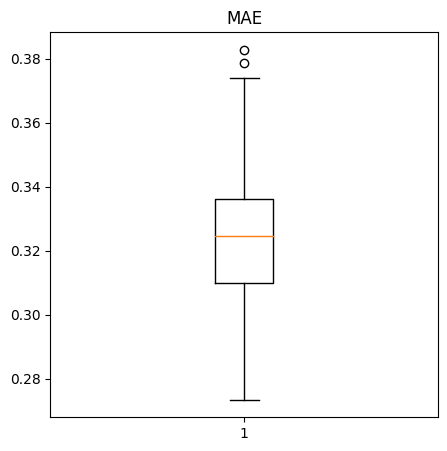

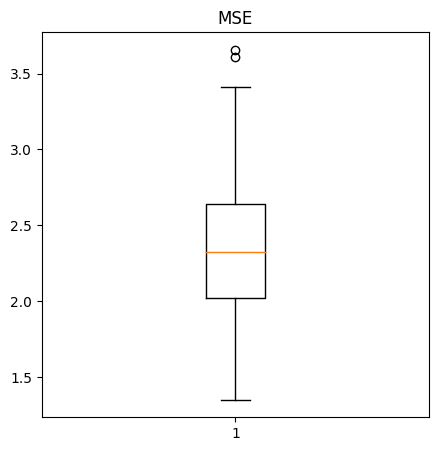

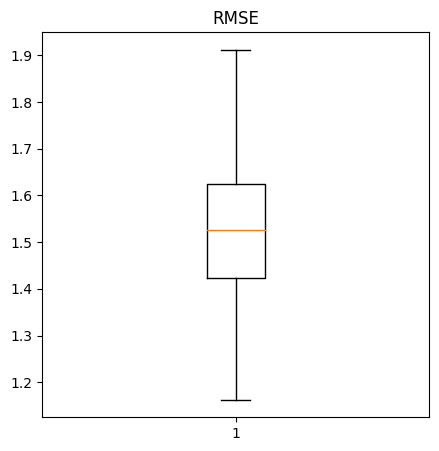

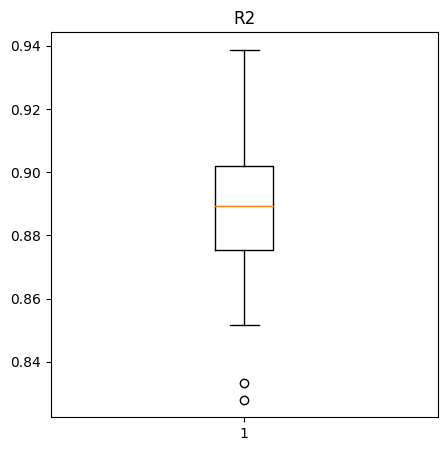

In [306]:
from sklearn.tree import DecisionTreeRegressor

# initialize a list to store the results
lstResults5 = []

selector5 = SelectKBest(f_regression, k=8)
selector5.fit(X_train5, y_train5)
X_train_selected5 = selector5.transform(X_train5)
X_test_selected5 = selector5.transform(X_test5)
model5 = LinearRegression()

for i in range(100):
    # split the data into training and testing sets
    X_train5, X_test5, y_train5, y_test5 = train_test_split(feature_vector2, target_vector2, test_size=0.3, random_state=i)

    # train a linear regression model on the selected features
    model5 = DecisionTreeRegressor().fit(X_train5, y_train5)
    # make predictions on the testing set
    y_pred5 = model5.predict(X_test5)

   # calculate regression metrics and append to the results list
    metrics5 = {'MAE': mean_absolute_error(y_test5, y_pred5),
               'MSE': mean_squared_error(y_test5, y_pred5),
               'RMSE': mean_squared_error(y_test5, y_pred5, squared=False),
               'R2': r2_score(y_test5, y_pred5)}
    lstResults5.append(metrics5)

print(metrics5)
# Convert the results to a DataFrame
df5 = pd.DataFrame(lstResults5)

# Plot a boxplot for each metric

for column in df5.columns:
    plt.figure(figsize=(5,5))
    plt.boxplot(df5[column], vert=True)
    plt.title(column)
    plt.show()
Results5['DecisionTreeRegressor']={'MAE': round(df5['MAE'].mean(),3), 'MSE': round(df5['MSE'].mean(),3), 'RMSE': round(df5['RMSE'].mean(),3), 'R2': round(df5['R2'].mean(),3)}

Sequential Feature Selection (LOW)

{'MAE': 0.3215207044264636, 'MSE': 2.2710226082817706, 'RMSE': 1.5069912435982402, 'R2': 0.8782570721963562}


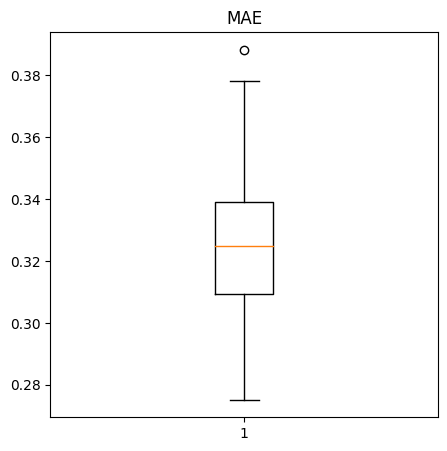

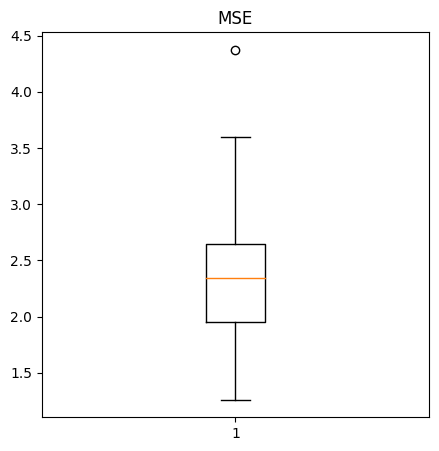

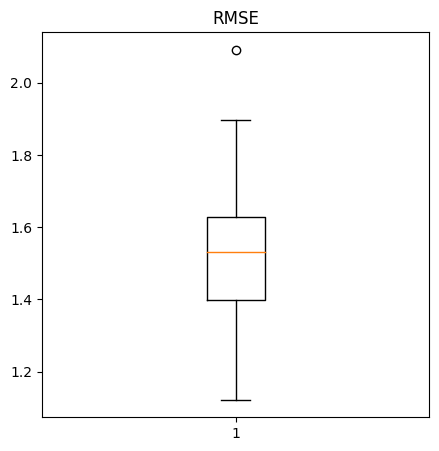

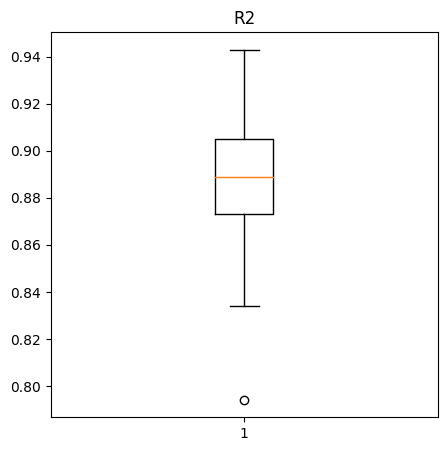

In [307]:
from sklearn.tree import DecisionTreeRegressor

# initialize a list to store the results
lstResults6 = []

sfs6 = SequentialFeatureSelector(model6, n_features_to_select=6, direction='backward')
sfs6.fit(X_train6, y_train6)
X_train_selected6 = sfs6.transform(X_train6)
X_test_selected6 = sfs6.transform(X_test6)

for i in range(100):
    # split the data into training and testing sets
    X_train6, X_test6, y_train6, y_test6 = train_test_split(feature_vector2, target_vector2, test_size=0.3, random_state=i)

    # train a linear regression model on the selected features
    model6 = DecisionTreeRegressor().fit(X_train6, y_train6)
    # make predictions on the testing set
    y_pred6 = model6.predict(X_test6)

   # calculate regression metrics and append to the results list
    metrics6 = {'MAE': mean_absolute_error(y_test6, y_pred6),
               'MSE': mean_squared_error(y_test6, y_pred6),
               'RMSE': mean_squared_error(y_test6, y_pred6, squared=False),
               'R2': r2_score(y_test6, y_pred6)}
    lstResults6.append(metrics6)

print(metrics6)
# Convert the results to a DataFrame
df6 = pd.DataFrame(lstResults6)

# Plot a boxplot for each metric

for column in df6.columns:
    plt.figure(figsize=(5,5))
    plt.boxplot(df6[column], vert=True)
    plt.title(column)
    plt.show()
Results6['DecisionTreeRegressor']={'MAE': round(df6['MAE'].mean(),3), 'MSE': round(df6['MSE'].mean(),3), 'RMSE': round(df6['RMSE'].mean(),3), 'R2': round(df6['R2'].mean(),3)}

## d. Visualize the results using proper charts to show the quality of the different predictive models.

### Removing features with low variance method (HIGH) Visualize

In [308]:
df_Results1 = pd.DataFrame.from_dict(Results1)
df_Results1

,LinearRegression,KNeighborsRegressor,DecisionTreeRegressor
MAE,1.971,0.301,0.330
MSE,27.161,2.172,2.451
RMSE,5.209,1.470,1.556
R2,-0.239,0.901,0.888


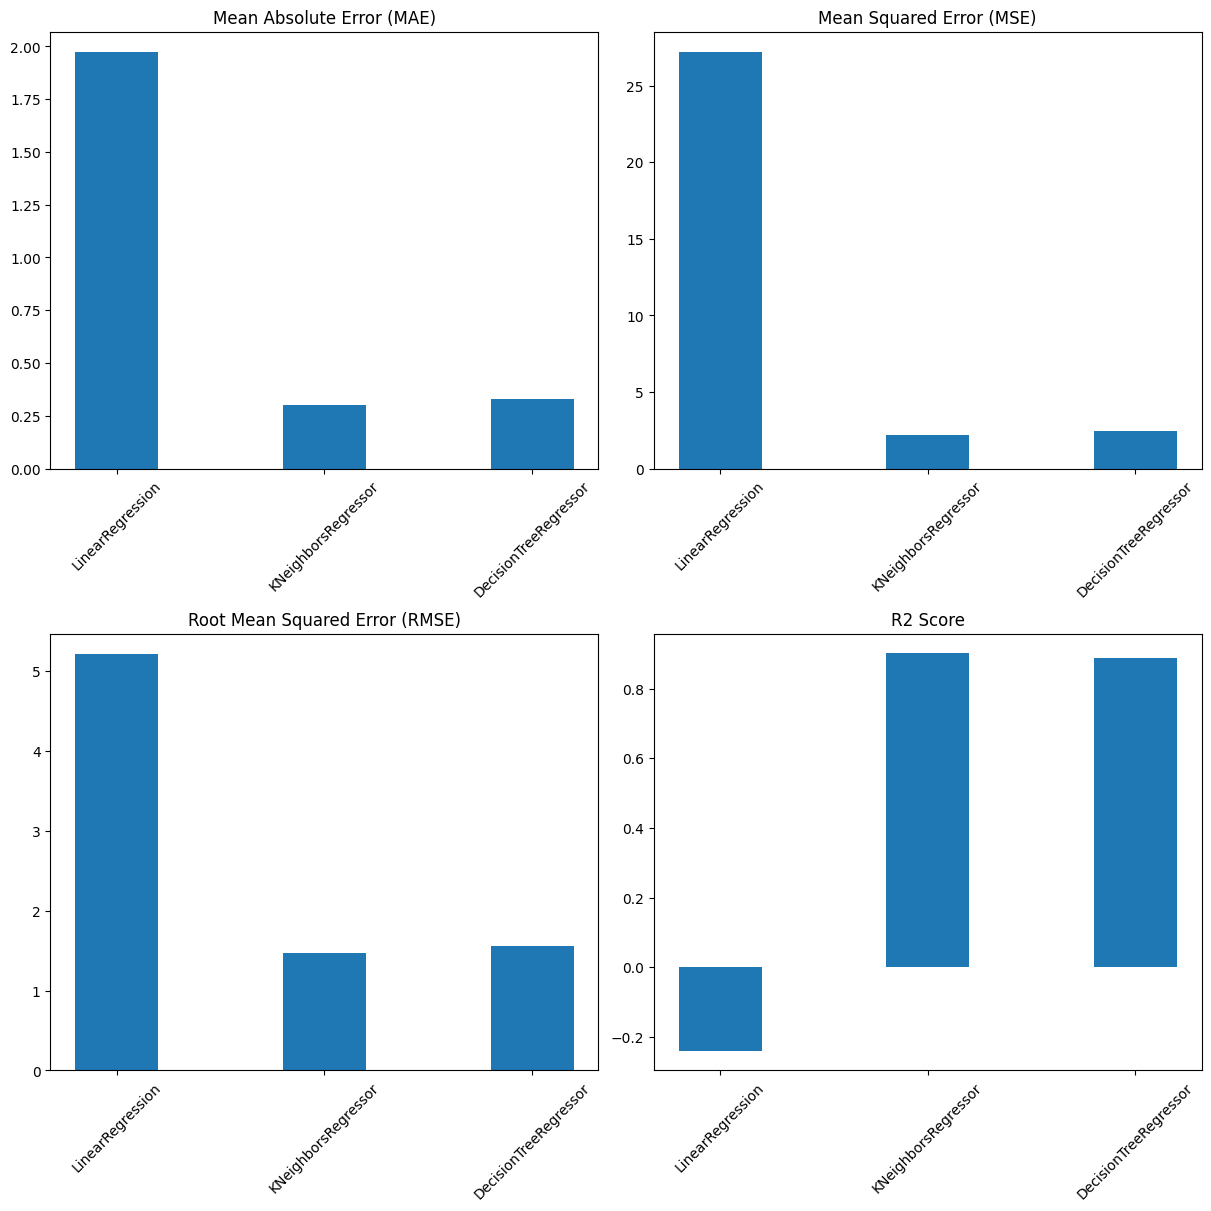

In [309]:
import matplotlib.pyplot as plt

# Extract model names and metrics
model_names = list(Results1.keys())
mae_values = [Results1[model]['MAE'] for model in model_names]
mse_values = [Results1[model]['MSE'] for model in model_names]
rmse_values = [Results1[model]['RMSE'] for model in model_names]
r2_values = [Results1[model]['R2'] for model in model_names]

# Set the positions for the x-axis labels
x_pos = np.arange(len(model_names))

# Create a function to plot a specific metric
def plot_metric(ax, metric_values, metric_name):
    ax.bar(x_pos, metric_values, width=0.4)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(model_names, rotation=45)
    ax.set_title(metric_name)
# Create a single plot with 4 subplots for each metric
fig, axes = plt.subplots(2, 2, figsize=(12, 12), constrained_layout=True)
plot_metric(axes[0, 0], mae_values, 'Mean Absolute Error (MAE)')
plot_metric(axes[0, 1], mse_values, 'Mean Squared Error (MSE)')
plot_metric(axes[1, 0], rmse_values, 'Root Mean Squared Error (RMSE)')
plot_metric(axes[1, 1], r2_values, 'R2 Score')

plt.show()

### SelectKBest method (HIGH) Visualize

In [310]:
df_Results2 = pd.DataFrame.from_dict(Results2)
df_Results2

,LinearRegression,KNeighborsRegressor,DecisionTreeRegressor
MAE,1.706,0.338,0.329
MSE,21.915,2.598,2.443
RMSE,4.679,1.608,1.553
R2,0.001,0.882,0.889


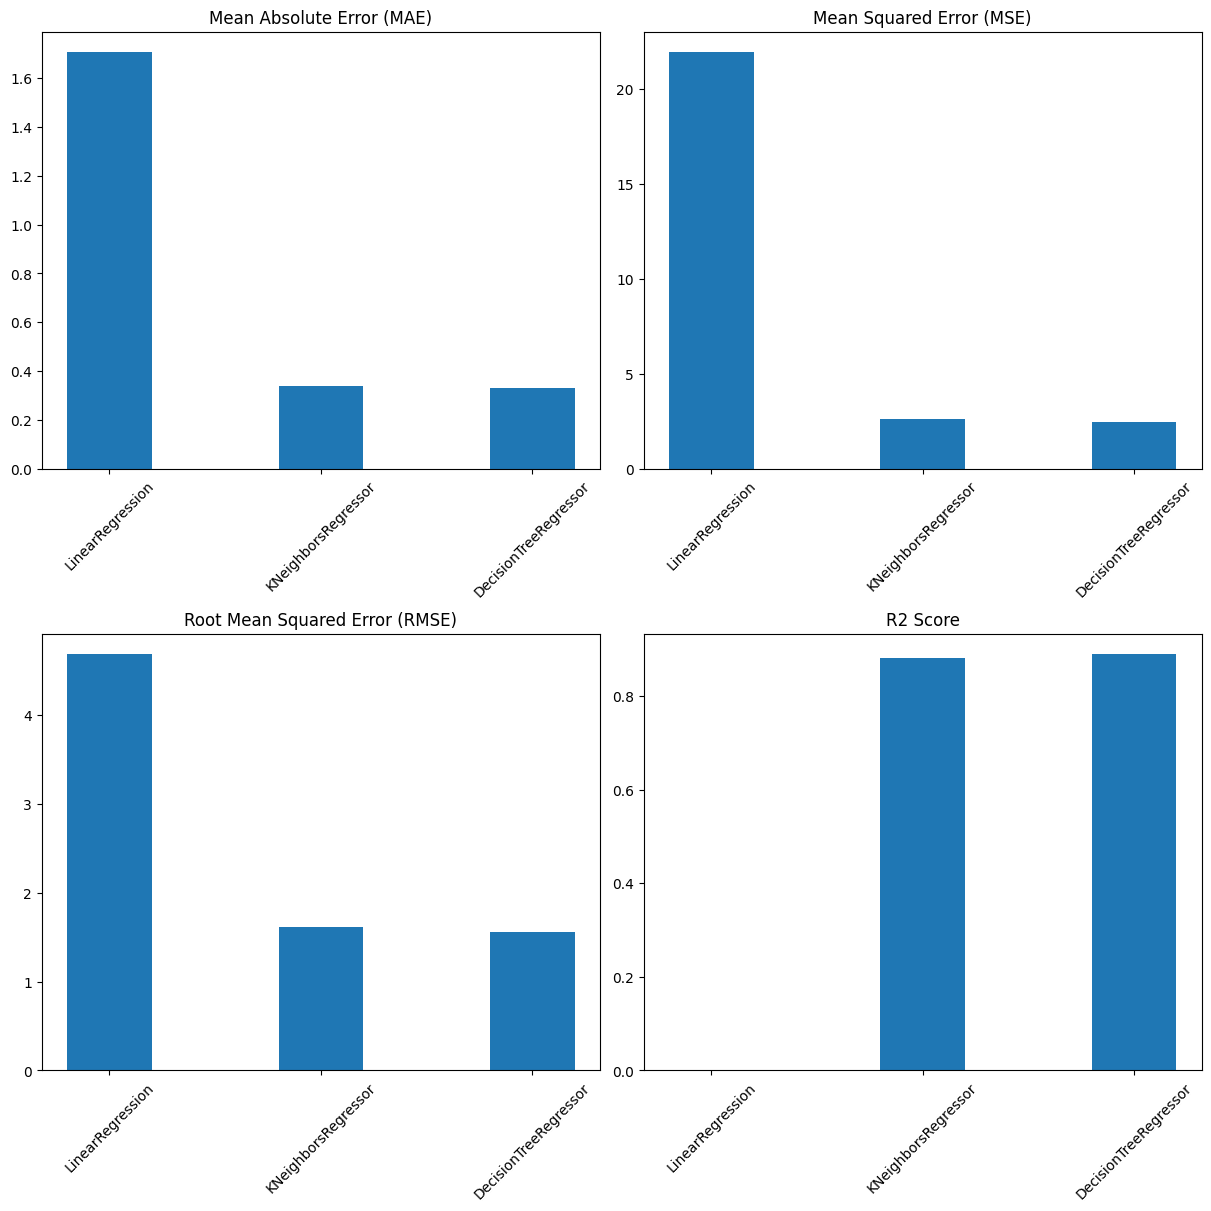

In [311]:
# Extract model names and metrics
model_names = list(Results2.keys())
mae_values = [Results2[model]['MAE'] for model in model_names]
mse_values = [Results2[model]['MSE'] for model in model_names]
rmse_values = [Results2[model]['RMSE'] for model in model_names]
r2_values = [Results2[model]['R2'] for model in model_names]

# Set the positions for the x-axis labels
x_pos = np.arange(len(model_names))

# Create a function to plot a specific metric
def plot_metric(ax, metric_values, metric_name):
    ax.bar(x_pos, metric_values, width=0.4)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(model_names, rotation=45)
    ax.set_title(metric_name)
# Create a single plot with 4 subplots for each metric
fig, axes = plt.subplots(2, 2, figsize=(12, 12), constrained_layout=True)
plot_metric(axes[0, 0], mae_values, 'Mean Absolute Error (MAE)')
plot_metric(axes[0, 1], mse_values, 'Mean Squared Error (MSE)')
plot_metric(axes[1, 0], rmse_values, 'Root Mean Squared Error (RMSE)')
plot_metric(axes[1, 1], r2_values, 'R2 Score')

plt.show()

### Sequential Feature Selection (HIGH) Visualize

In [312]:
df_Results3 = pd.DataFrame.from_dict(Results3)
df_Results3

,LinearRegression,KNeighborsRegressor,DecisionTreeRegressor
MAE,1.706,2.063,0.330
MSE,21.913,28.998,2.440
RMSE,4.679,5.368,1.552
R2,0.001,-0.322,0.889


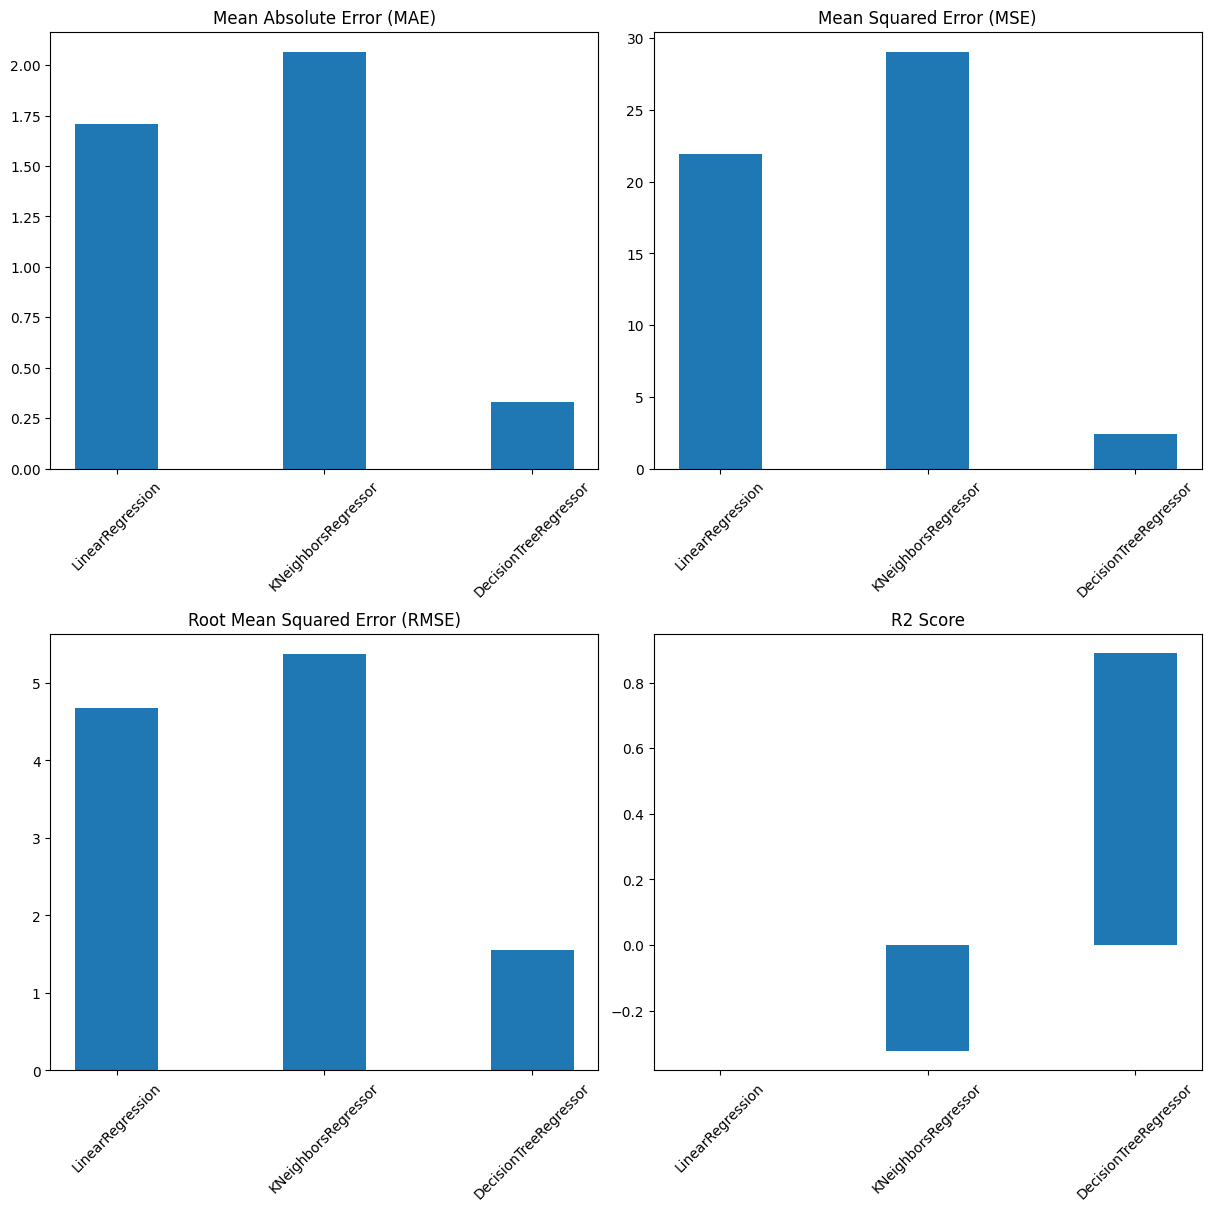

In [313]:
# Extract model names and metrics
model_names = list(Results3.keys())
mae_values = [Results3[model]['MAE'] for model in model_names]
mse_values = [Results3[model]['MSE'] for model in model_names]
rmse_values = [Results3[model]['RMSE'] for model in model_names]
r2_values = [Results3[model]['R2'] for model in model_names]

# Set the positions for the x-axis labels
x_pos = np.arange(len(model_names))

# Create a function to plot a specific metric
def plot_metric(ax, metric_values, metric_name):
    ax.bar(x_pos, metric_values, width=0.4)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(model_names, rotation=45)
    ax.set_title(metric_name)
# Create a single plot with 4 subplots for each metric
fig, axes = plt.subplots(2, 2, figsize=(12, 12), constrained_layout=True)
plot_metric(axes[0, 0], mae_values, 'Mean Absolute Error (MAE)')
plot_metric(axes[0, 1], mse_values, 'Mean Squared Error (MSE)')
plot_metric(axes[1, 0], rmse_values, 'Root Mean Squared Error (RMSE)')
plot_metric(axes[1, 1], r2_values, 'R2 Score')

plt.show()

### Removing features with low variance method (LOW) Visualize

In [314]:
df_Results4 = pd.DataFrame.from_dict(Results4)
df_Results4

,LinearRegression,KNeighborsRegressor,DecisionTreeRegressor
MAE,1.934,0.297,0.327
MSE,26.029,2.111,2.373
RMSE,5.099,1.450,1.531
R2,-0.233,0.900,0.888


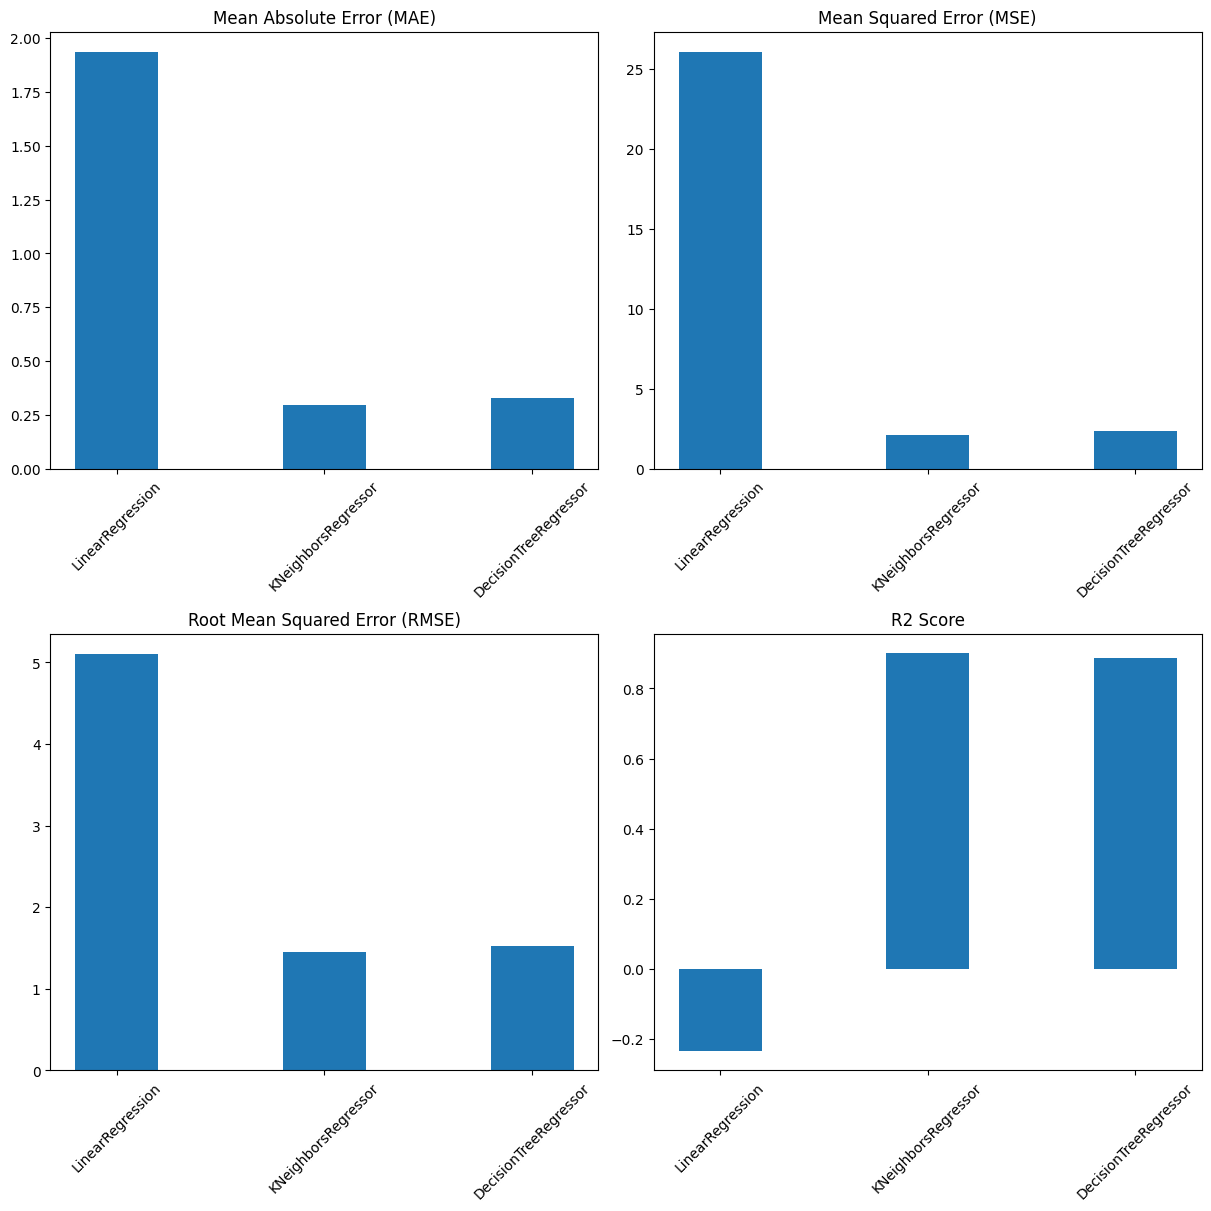

In [315]:
# Extract model names and metrics
model_names = list(Results4.keys())
mae_values = [Results4[model]['MAE'] for model in model_names]
mse_values = [Results4[model]['MSE'] for model in model_names]
rmse_values = [Results4[model]['RMSE'] for model in model_names]
r2_values = [Results4[model]['R2'] for model in model_names]

# Set the positions for the x-axis labels
x_pos = np.arange(len(model_names))

# Create a function to plot a specific metric
def plot_metric(ax, metric_values, metric_name):
    ax.bar(x_pos, metric_values, width=0.4)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(model_names, rotation=45)
    ax.set_title(metric_name)
# Create a single plot with 4 subplots for each metric
fig, axes = plt.subplots(2, 2, figsize=(12, 12), constrained_layout=True)
plot_metric(axes[0, 0], mae_values, 'Mean Absolute Error (MAE)')
plot_metric(axes[0, 1], mse_values, 'Mean Squared Error (MSE)')
plot_metric(axes[1, 0], rmse_values, 'Root Mean Squared Error (RMSE)')
plot_metric(axes[1, 1], r2_values, 'R2 Score')

plt.show()

### SelectKBest method (LOW) Visualize

In [316]:
df_Results5 = pd.DataFrame.from_dict(Results5)
df_Results5

,LinearRegression,KNeighborsRegressor,DecisionTreeRegressor
MAE,1.677,2.028,0.326
MSE,21.113,27.906,2.359
RMSE,4.592,5.266,1.528
R2,0.001,-0.320,0.888


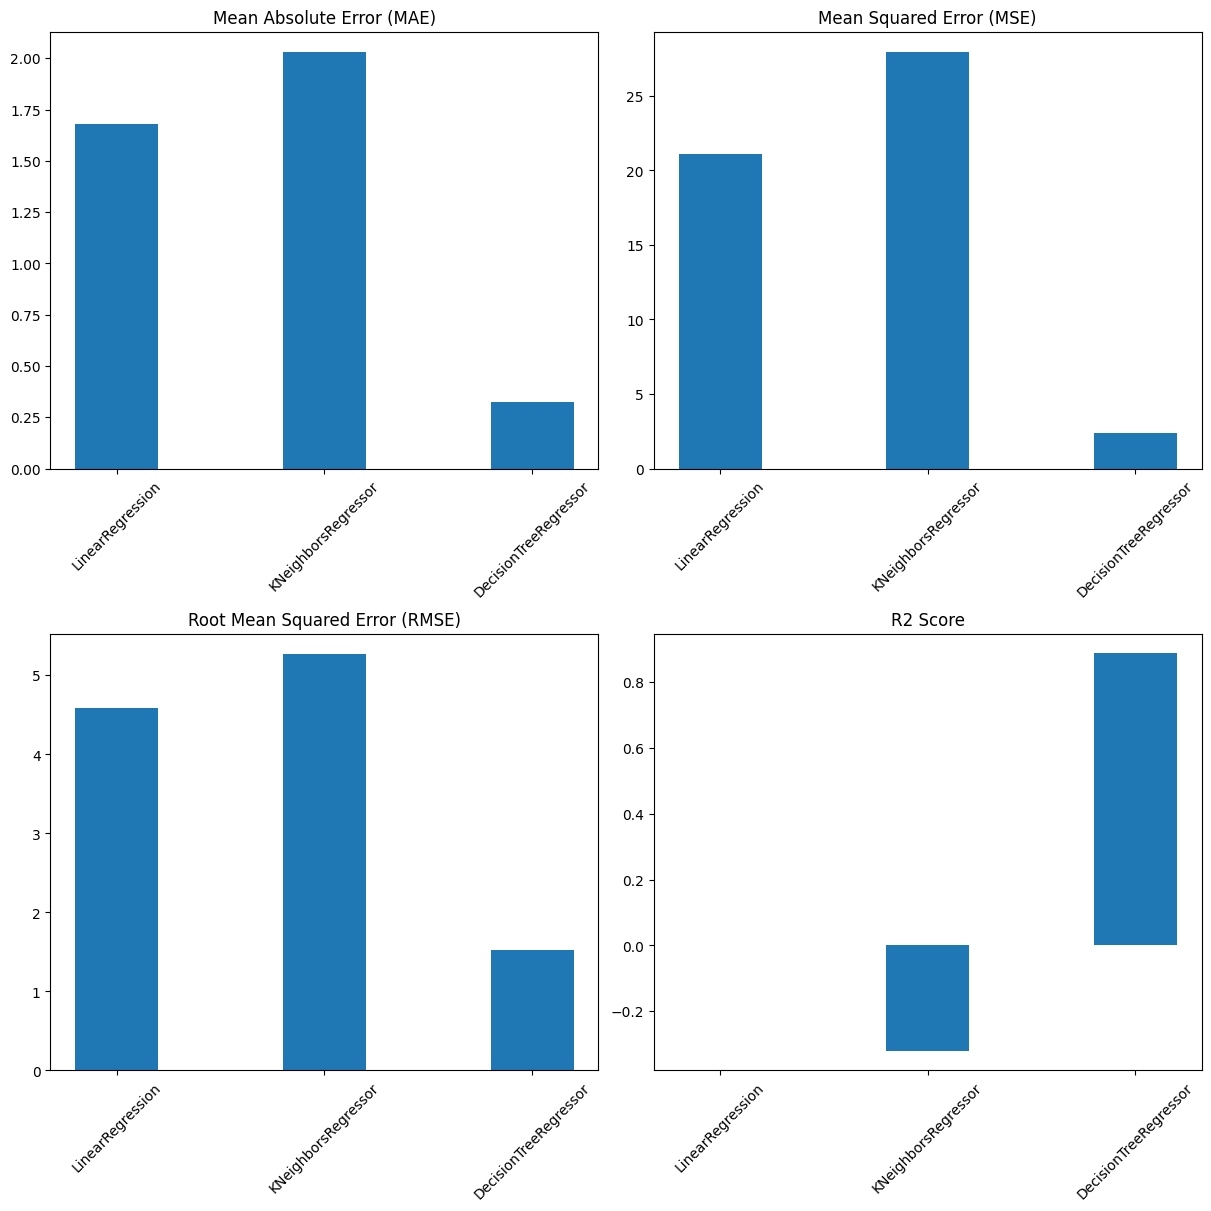

In [317]:
# Extract model names and metrics
model_names = list(Results5.keys())
mae_values = [Results5[model]['MAE'] for model in model_names]
mse_values = [Results5[model]['MSE'] for model in model_names]
rmse_values = [Results5[model]['RMSE'] for model in model_names]
r2_values = [Results5[model]['R2'] for model in model_names]

# Set the positions for the x-axis labels
x_pos = np.arange(len(model_names))

# Create a function to plot a specific metric
def plot_metric(ax, metric_values, metric_name):
    ax.bar(x_pos, metric_values, width=0.4)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(model_names, rotation=45)
    ax.set_title(metric_name)
# Create a single plot with 4 subplots for each metric
fig, axes = plt.subplots(2, 2, figsize=(12, 12), constrained_layout=True)
plot_metric(axes[0, 0], mae_values, 'Mean Absolute Error (MAE)')
plot_metric(axes[0, 1], mse_values, 'Mean Squared Error (MSE)')
plot_metric(axes[1, 0], rmse_values, 'Root Mean Squared Error (RMSE)')
plot_metric(axes[1, 1], r2_values, 'R2 Score')

plt.show()

### Sequential Feature Selection (LOW) Visualize

In [318]:
df_Results6 = pd.DataFrame.from_dict(Results6)
df_Results6

,LinearRegression,KNeighborsRegressor,DecisionTreeRegressor
MAE,1.676,2.027,0.326
MSE,21.111,27.933,2.365
RMSE,4.592,5.268,1.528
R2,0.001,-0.322,0.888


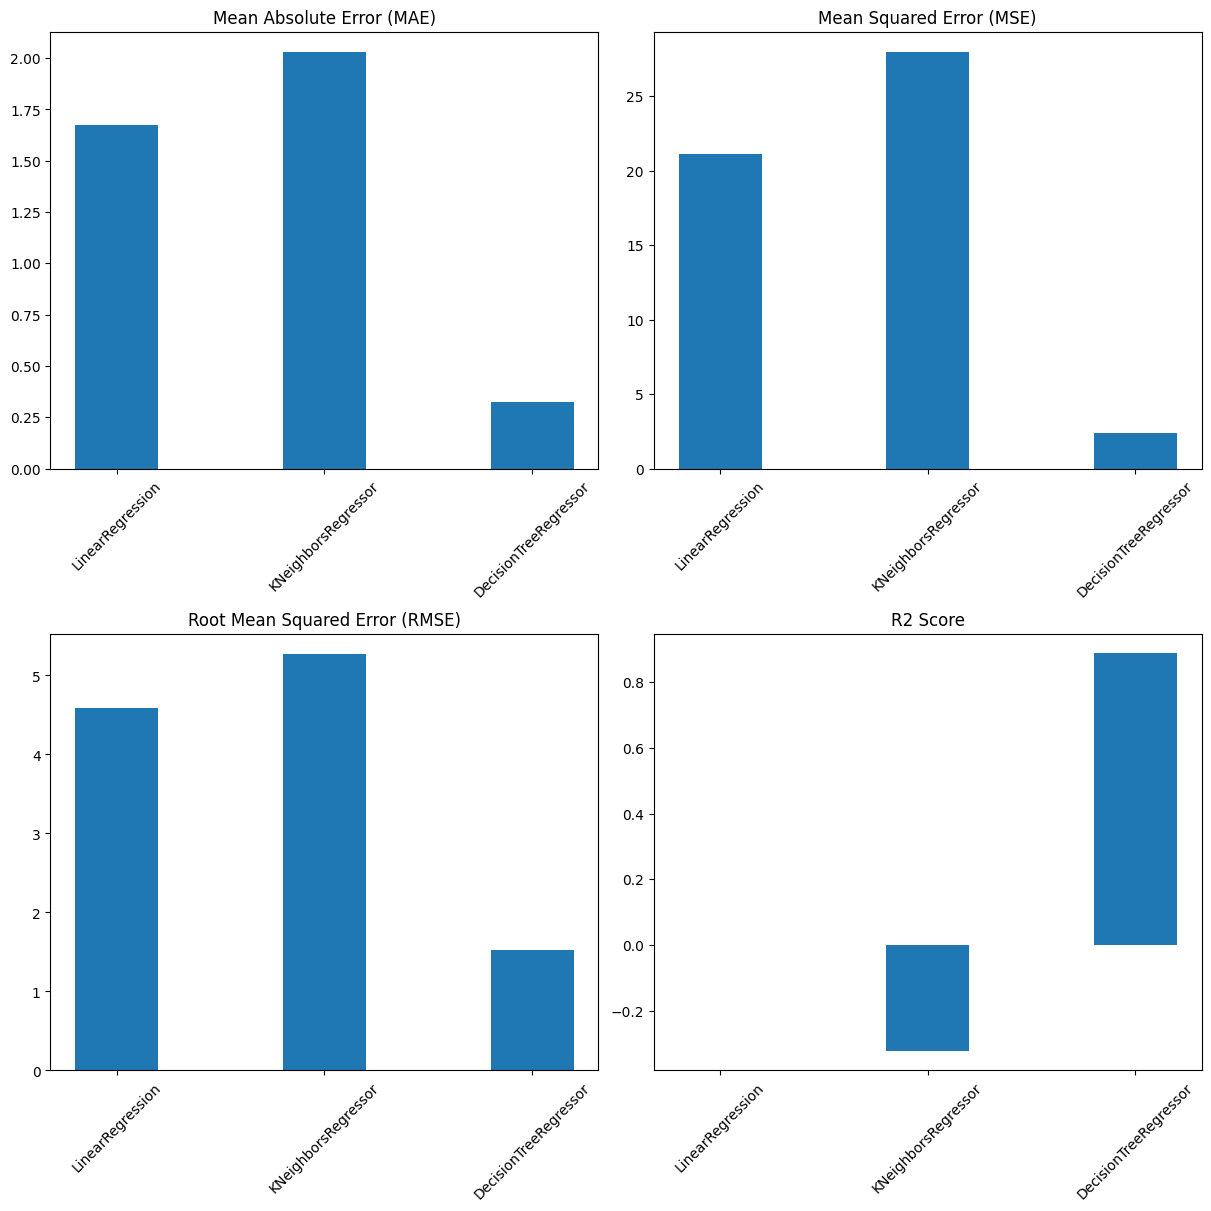

In [319]:
# Extract model names and metrics
model_names = list(Results6.keys())
mae_values = [Results6[model]['MAE'] for model in model_names]
mse_values = [Results6[model]['MSE'] for model in model_names]
rmse_values = [Results6[model]['RMSE'] for model in model_names]
r2_values = [Results6[model]['R2'] for model in model_names]

# Set the positions for the x-axis labels
x_pos = np.arange(len(model_names))

# Create a function to plot a specific metric
def plot_metric(ax, metric_values, metric_name):
    ax.bar(x_pos, metric_values, width=0.4)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(model_names, rotation=45)
    ax.set_title(metric_name)
# Create a single plot with 4 subplots for each metric
fig, axes = plt.subplots(2, 2, figsize=(12, 12), constrained_layout=True)
plot_metric(axes[0, 0], mae_values, 'Mean Absolute Error (MAE)')
plot_metric(axes[0, 1], mse_values, 'Mean Squared Error (MSE)')
plot_metric(axes[1, 0], rmse_values, 'Root Mean Squared Error (RMSE)')
plot_metric(axes[1, 1], r2_values, 'R2 Score')

plt.show()